## Подключение необходимых библиотек

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

import warnings

## Тестовый датафрейм "mpg"

In [2]:
mpg.head(10)

manufacturer       model  displ  year  cyl       trans drv  cty  hwy fl  \
0         audi          a4    1.8  1999    4    auto(l5)   f   18   29  p   
1         audi          a4    1.8  1999    4  manual(m5)   f   21   29  p   
2         audi          a4    2.0  2008    4  manual(m6)   f   20   31  p   
3         audi          a4    2.0  2008    4    auto(av)   f   21   30  p   
4         audi          a4    2.8  1999    6    auto(l5)   f   16   26  p   
5         audi          a4    2.8  1999    6  manual(m5)   f   18   26  p   
6         audi          a4    3.1  2008    6    auto(av)   f   18   27  p   
7         audi  a4 quattro    1.8  1999    4  manual(m5)   4   18   26  p   
8         audi  a4 quattro    1.8  1999    4    auto(l5)   4   16   25  p   
9         audi  a4 quattro    2.0  2008    4  manual(m6)   4   20   28  p   

     class  
0  compact  
1  compact  
2  compact  
3  compact  
4  compact  
5  compact  
6  compact  
7  compact  
8  compact  
9  compact

## Простейшая визуализация с использованиме geom_point по осям displ и hwy

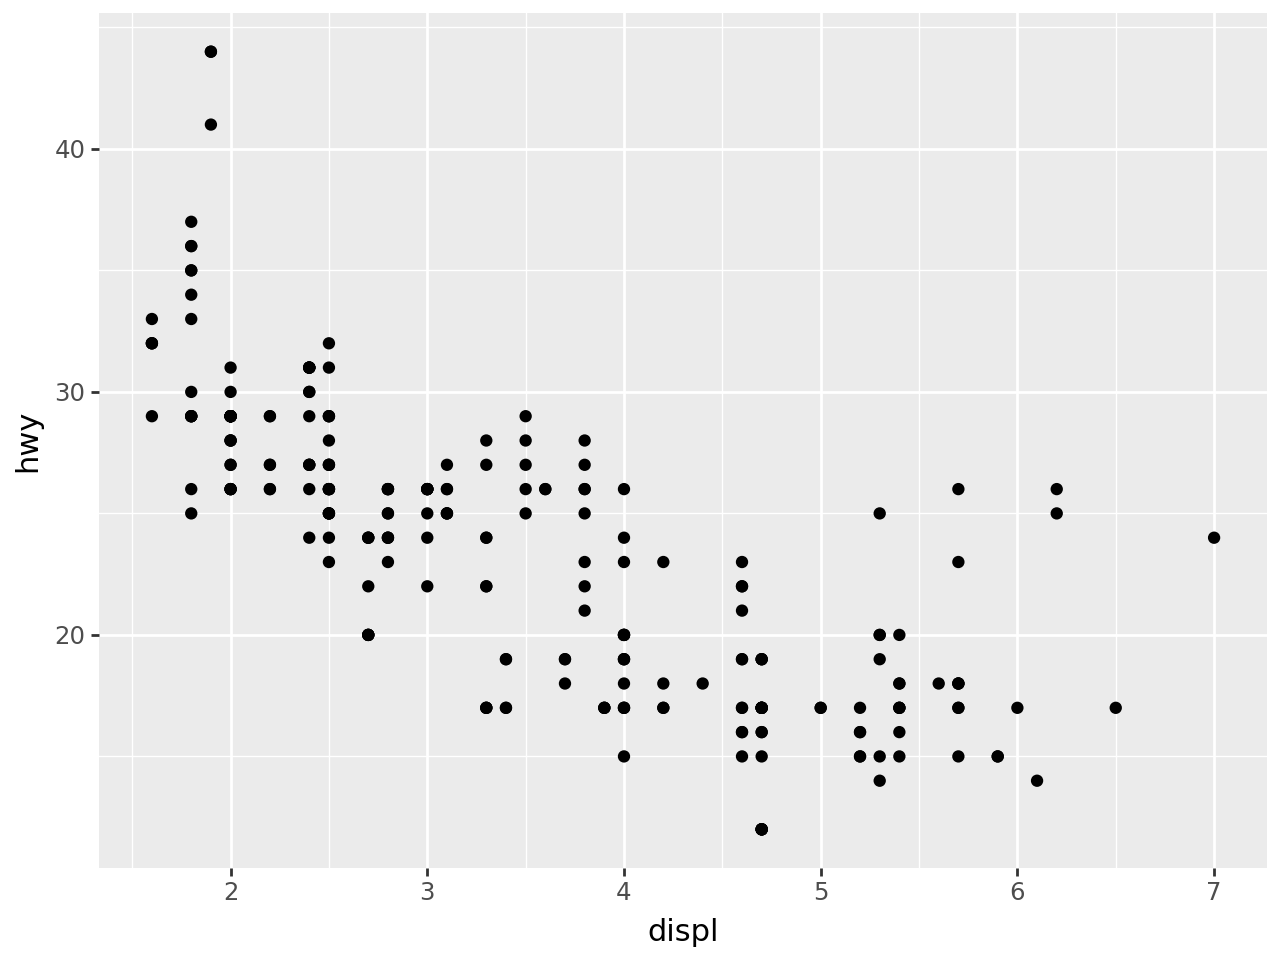

In [3]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

### Постройте два графика: в одном из них одна из осей должна быть соответствовать столбцу с элементами-категориями, во втором – обе (например, "class" и "drv")


### График, где одна из осей соответствует категориальному столбцу

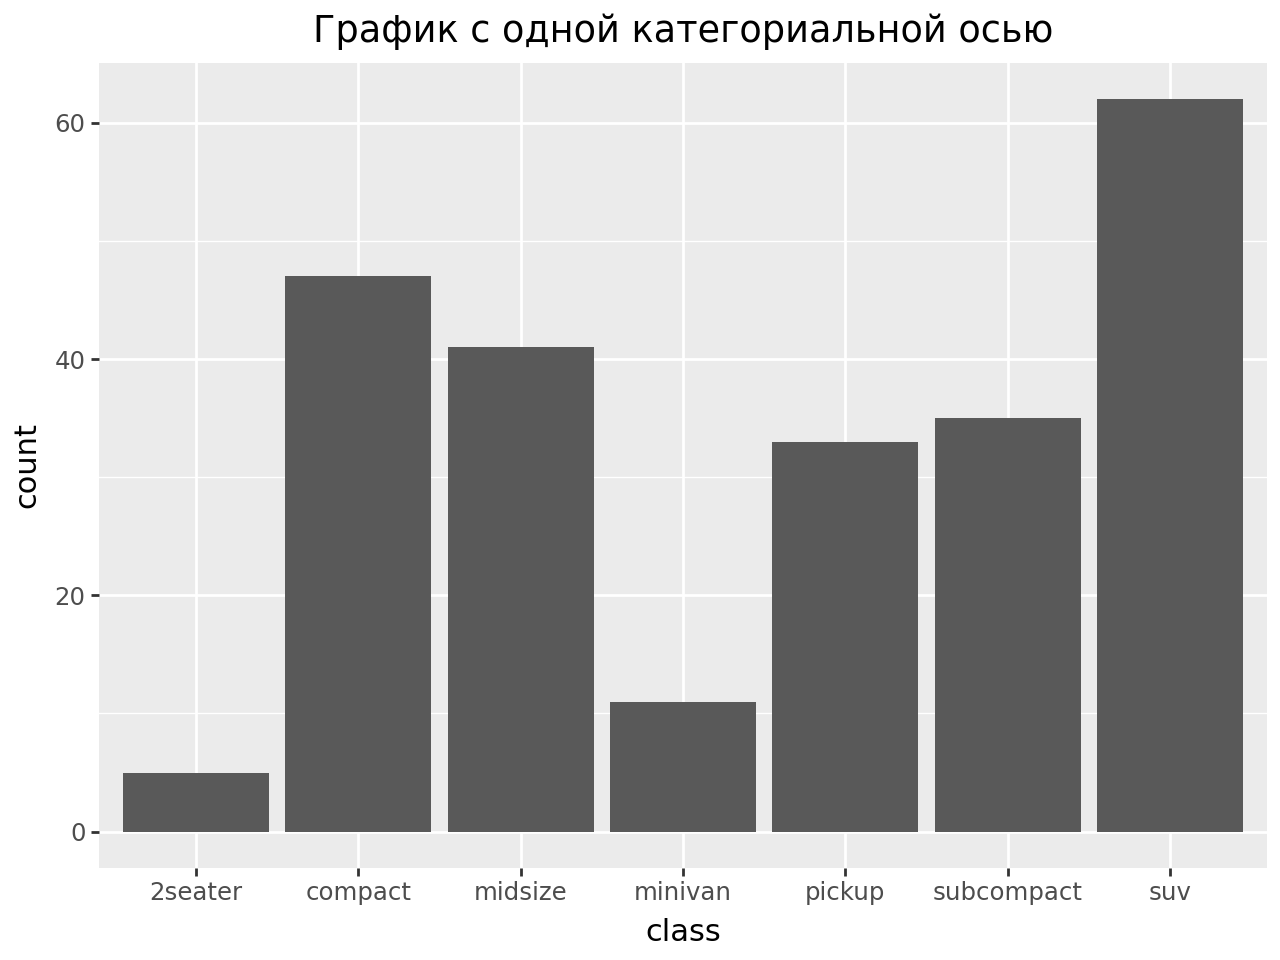

In [4]:
ggplot(data=mpg) +\
aes(x='class') +\
geom_bar() +\
ggtitle("График с одной категориальной осью")


### График, где обе оси соответствует категориальному столбцу

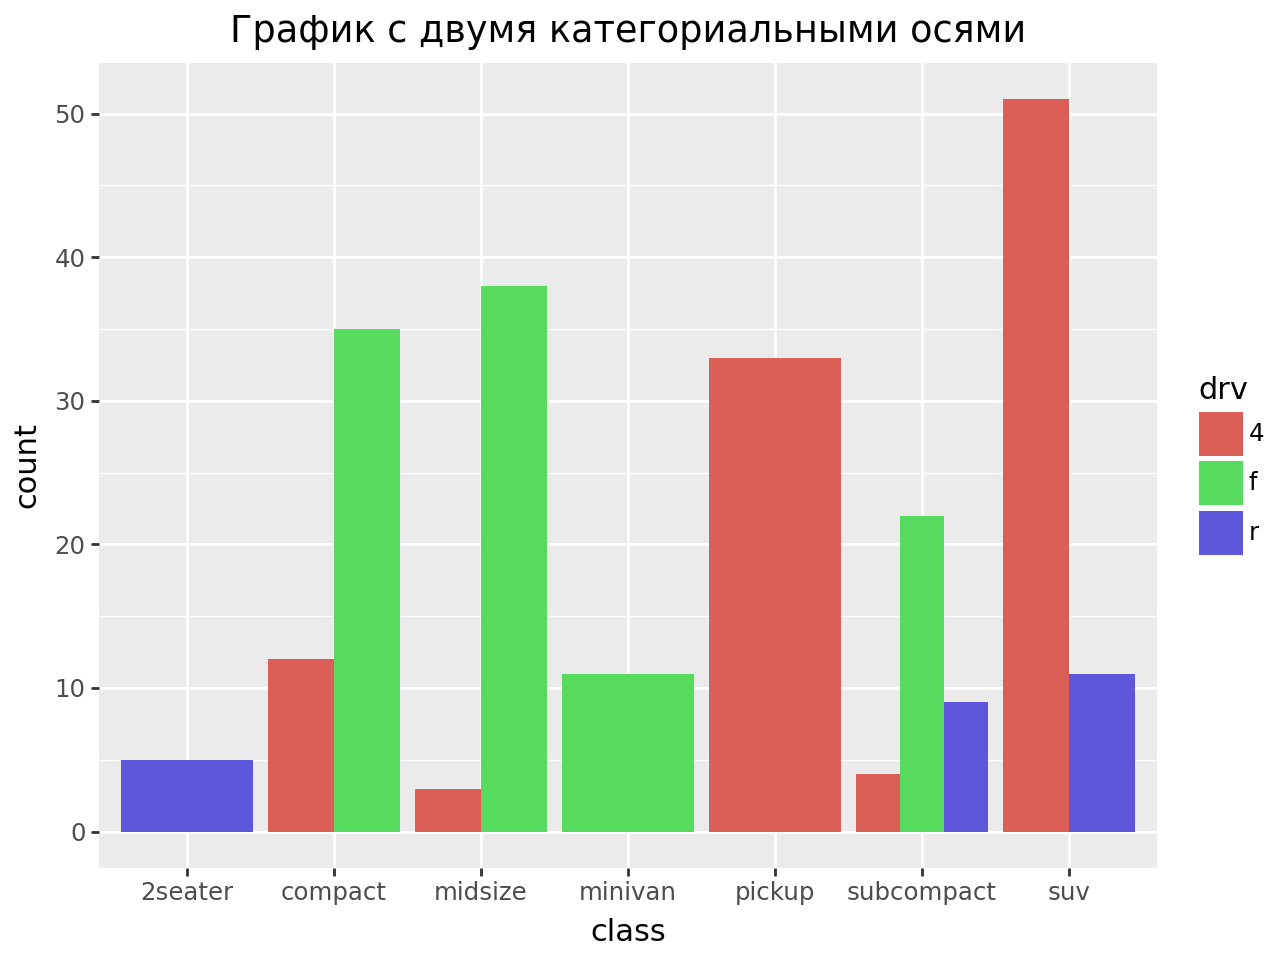

In [5]:
ggplot(mpg) +\
aes(x='class', fill='drv') +\
geom_bar(position='dodge') +\
ggtitle("График с двумя категориальными осями")

## Добавим красок, оттенков и форм в графики

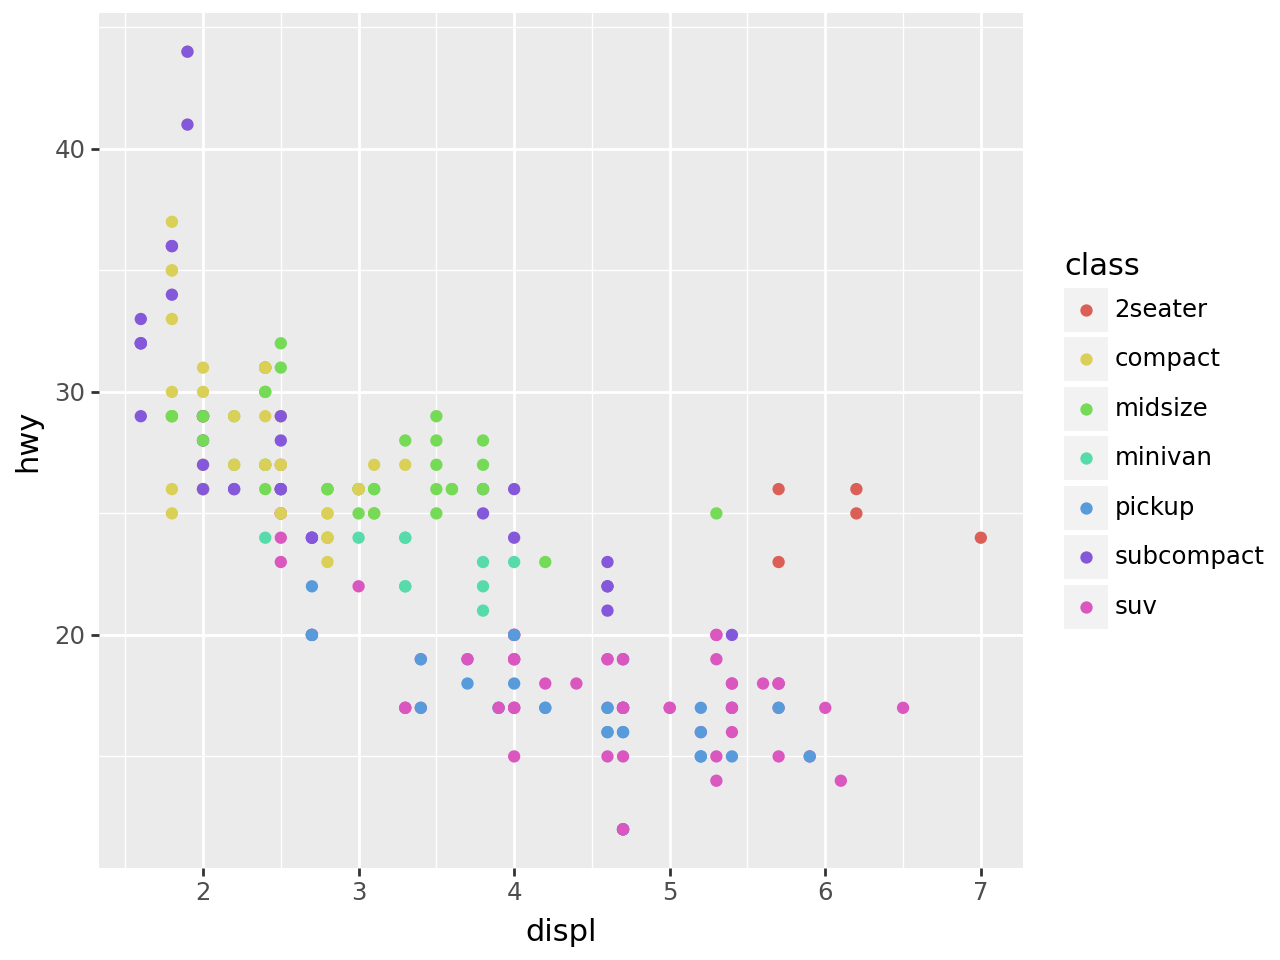

In [6]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", color="class"))

/home/vlad/3_Semestr/Data Visualization/Labs/vis_engine/lib/python3.11/site-packages/plotnine/scales/scale_alpha.py:71: PlotnineWarning: Using alpha for a discrete variable is not advised.


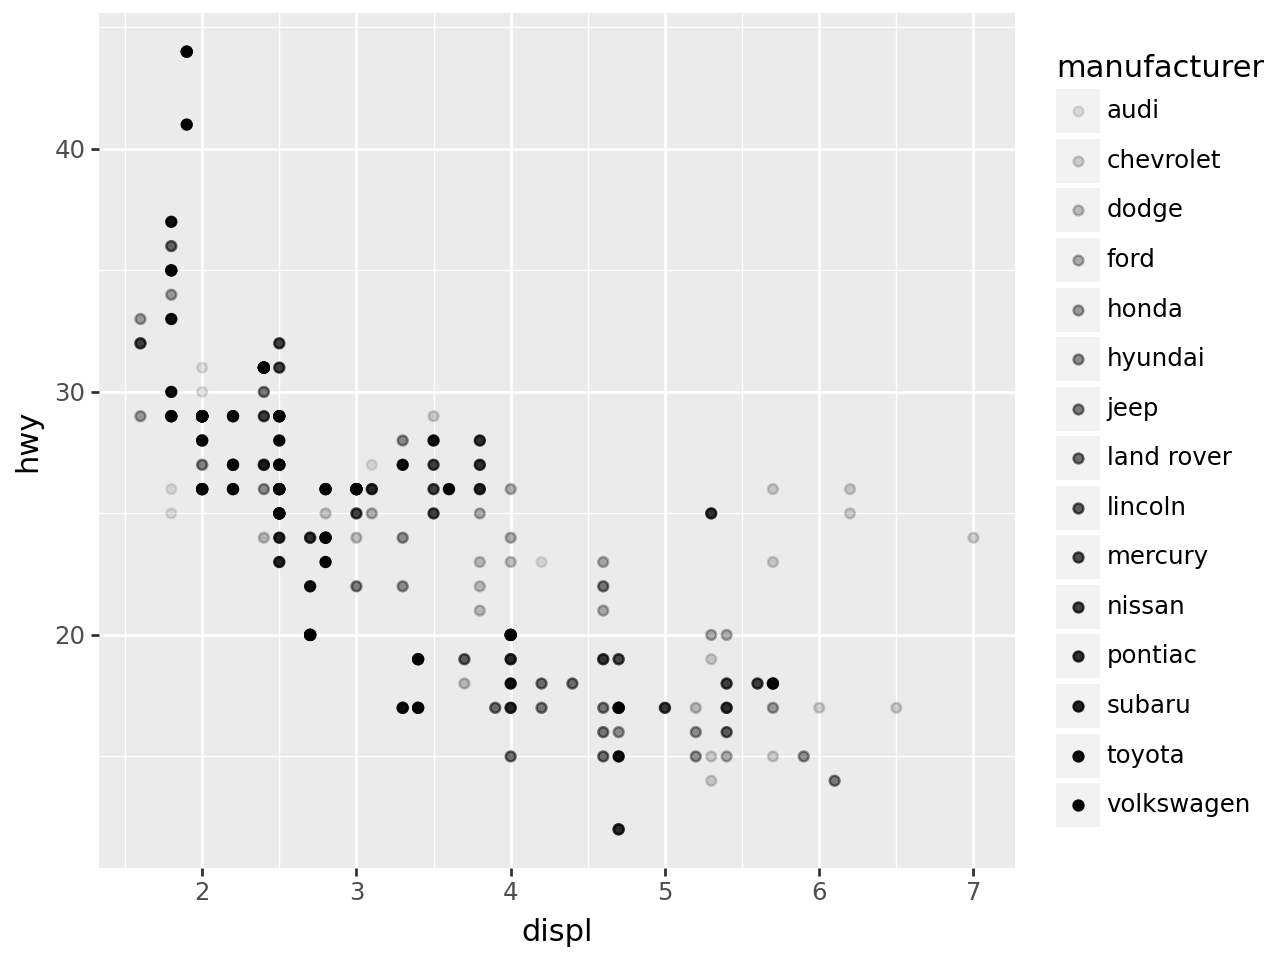

In [7]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", alpha="manufacturer"))

### Попробуйте сделать два графика: в одном размер точек будет соответствовать столбцу с элементами-категориями, во втором – столбцу с элементами-значениями

### Размер точек соответствует категориальному столбцу (class)

/home/vlad/3_Semestr/Data Visualization/Labs/vis_engine/lib/python3.11/site-packages/plotnine/scales/scale_size.py:46: PlotnineWarning: Using size for a discrete variable is not advised.


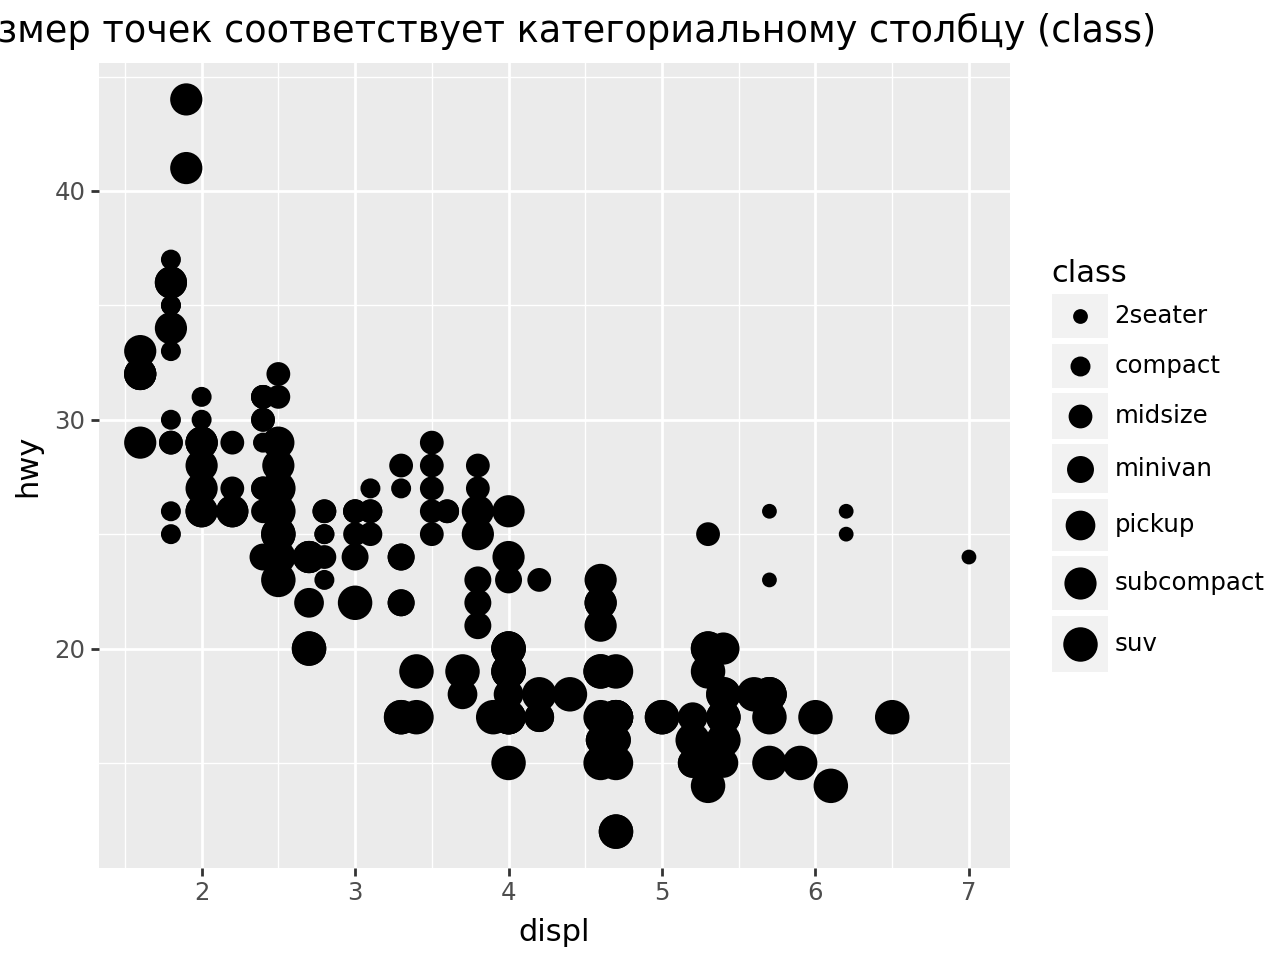

In [8]:
ggplot(mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", size="class")) +\
ggtitle("Размер точек соответствует категориальному столбцу (class)")

### Размер точек соответствует числовому столбцу (displ)

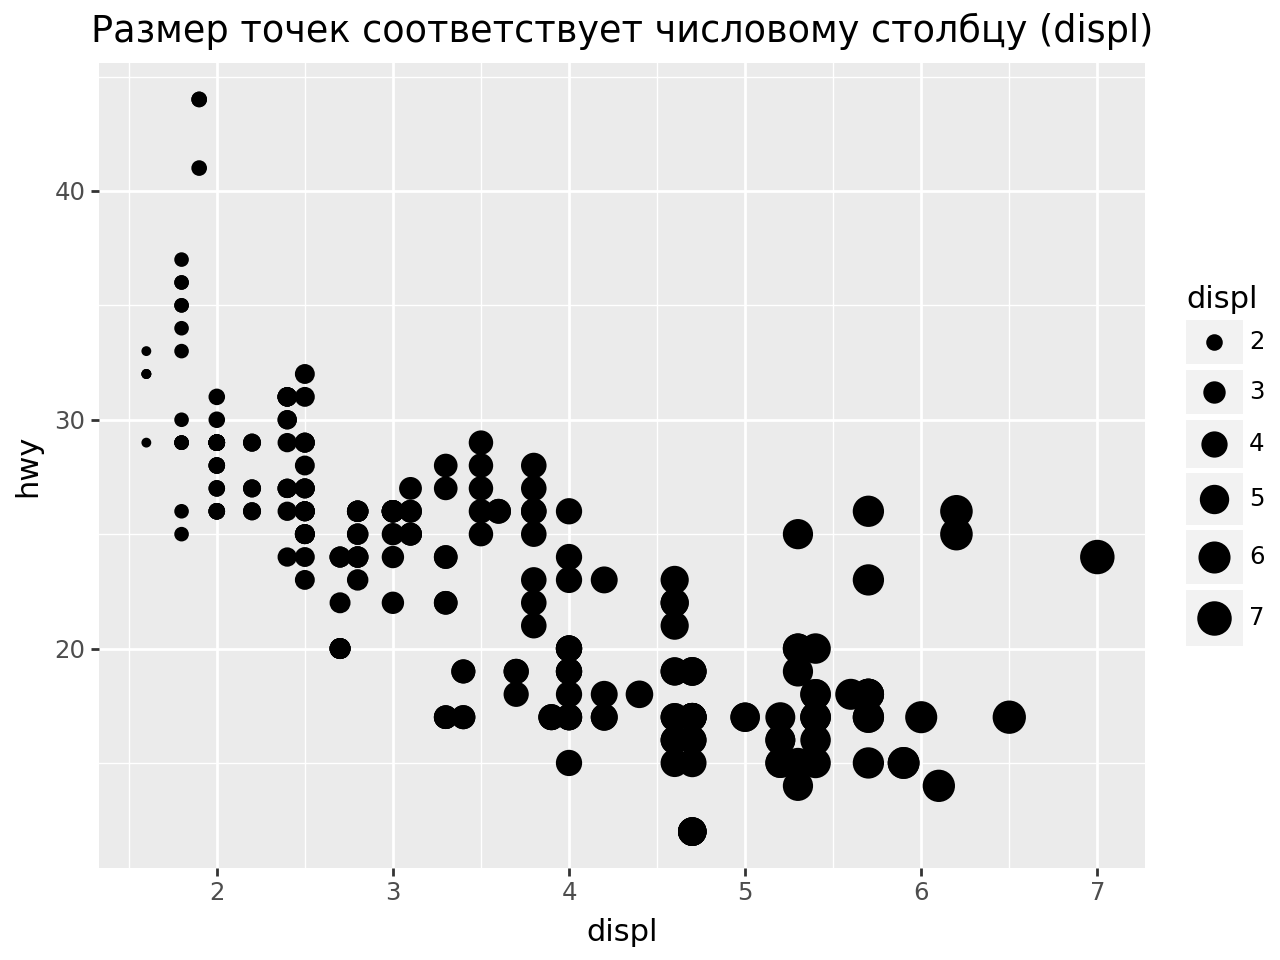

In [9]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", size="displ")) +\
ggtitle("Размер точек соответствует числовому столбцу (displ)")

### А что если использовать в качестве источника визуального свойства "форма" непрерывную категорию (например hwy)?

In [10]:
mpg['hwy_category'] = pd.cut(mpg['hwy'], bins=5, labels=[1, 2, 3, 4, 5])

/home/vlad/3_Semestr/Data Visualization/Labs/vis_engine/lib/python3.11/site-packages/plotnine/scales/scale_shape.py:82: PlotnineWarning: Using shapes for an ordinal variable is not advised.


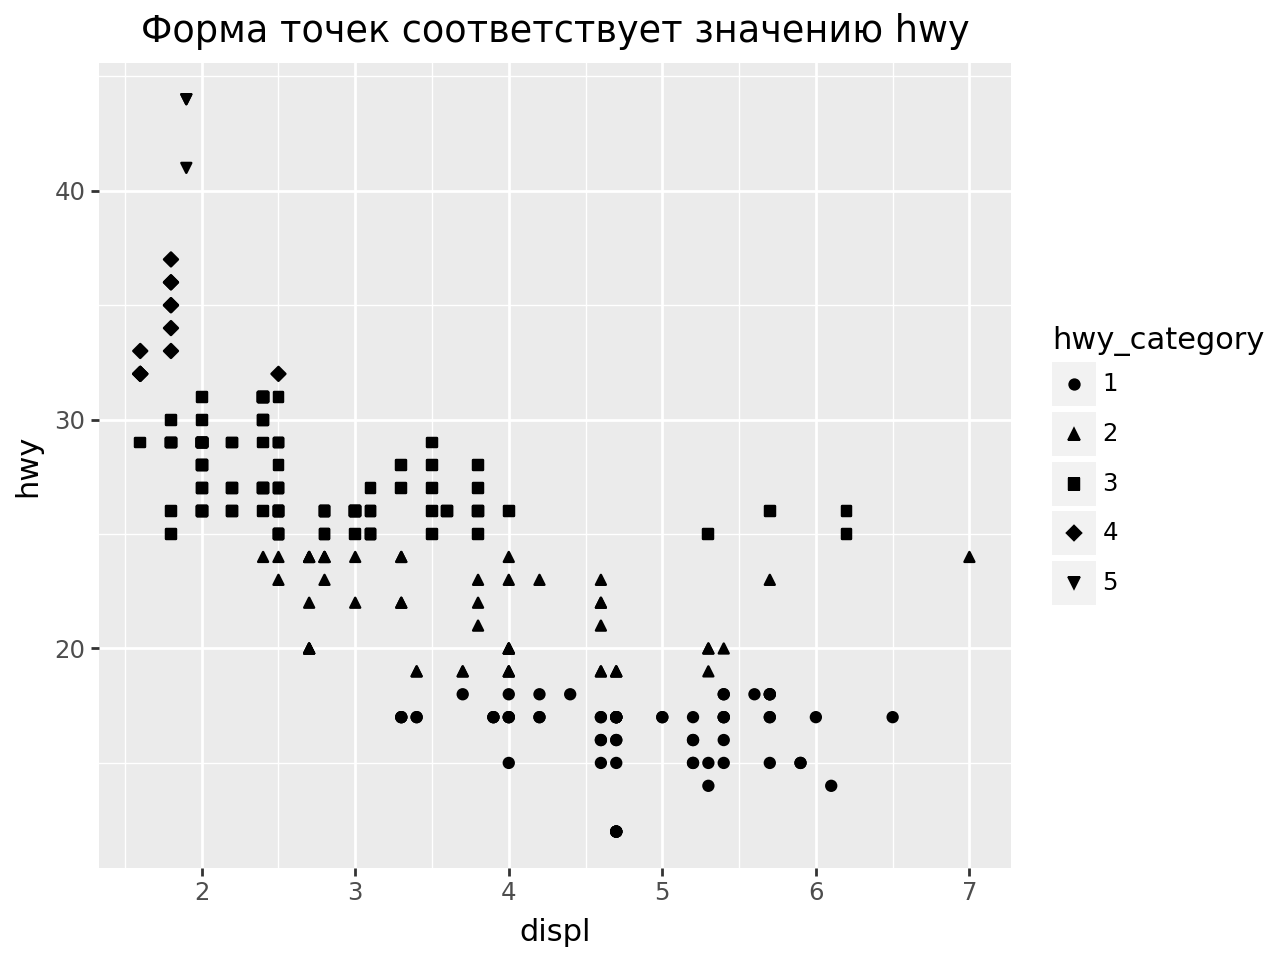

In [11]:
ggplot(mpg) + \
geom_point(mapping=aes(x='displ', y='hwy', shape='hwy_category')) + \
ggtitle('Форма точек соответствует значению hwy')

### Попробуйте сделать график с визуальным элементом, заданным условным оператором (например, color="displ < 5")

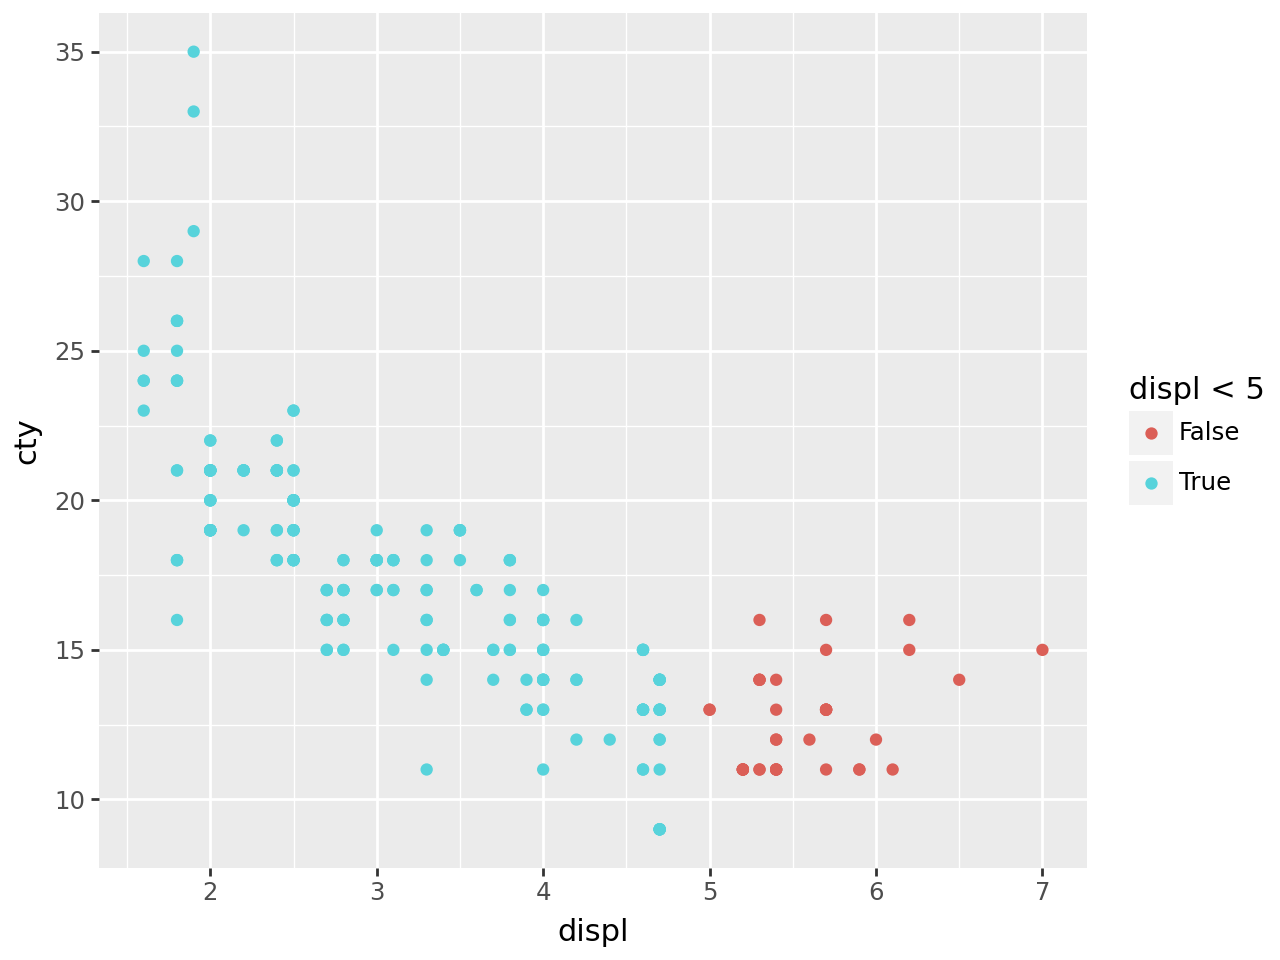

In [12]:
mpg['displ_5'] = mpg['displ'] < 5

ggplot(mpg) +\
geom_point(aes(x='displ', y='cty', color='displ_5')) +\
labs(color='displ < 5') 


### Попробуйте поэкспериментировать с графиками, где одной категории соответствуют различные визуальные элементы (пример ниже). Попробуйте привести пример, когда это имеет смысл.

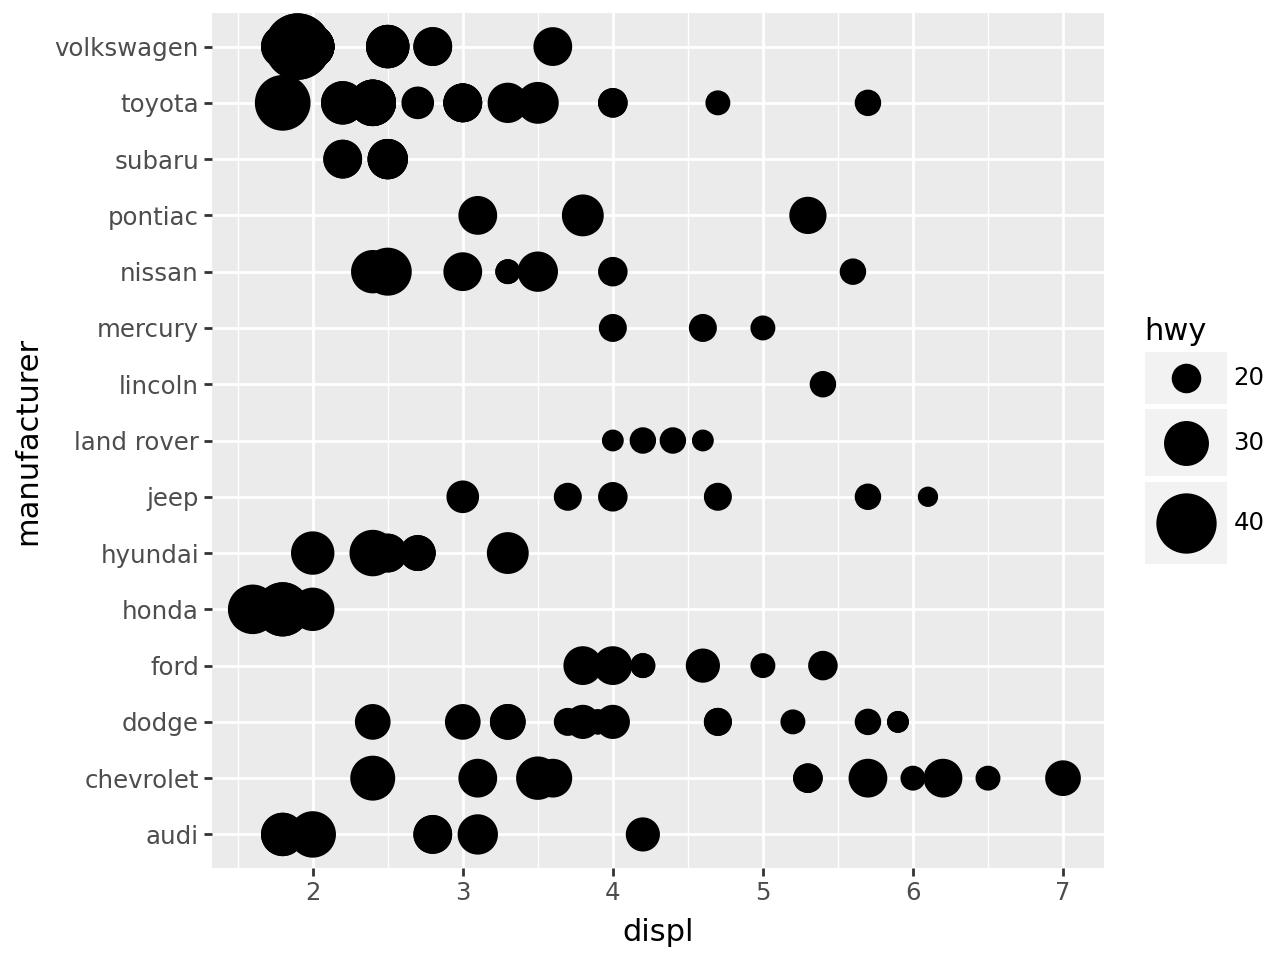

In [13]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="manufacturer", stroke="hwy"))

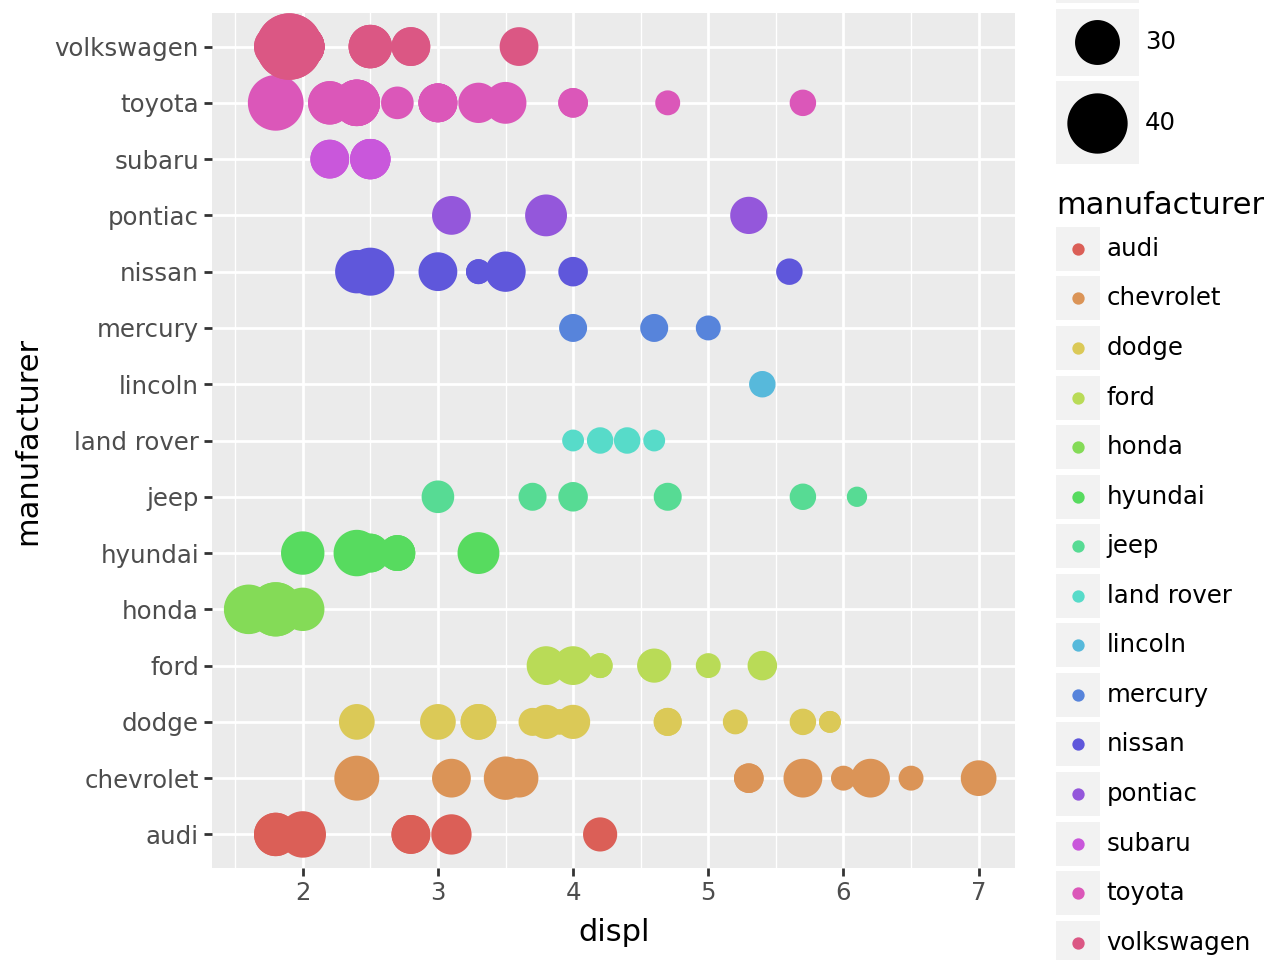

In [14]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="manufacturer", stroke="hwy", color="manufacturer"))

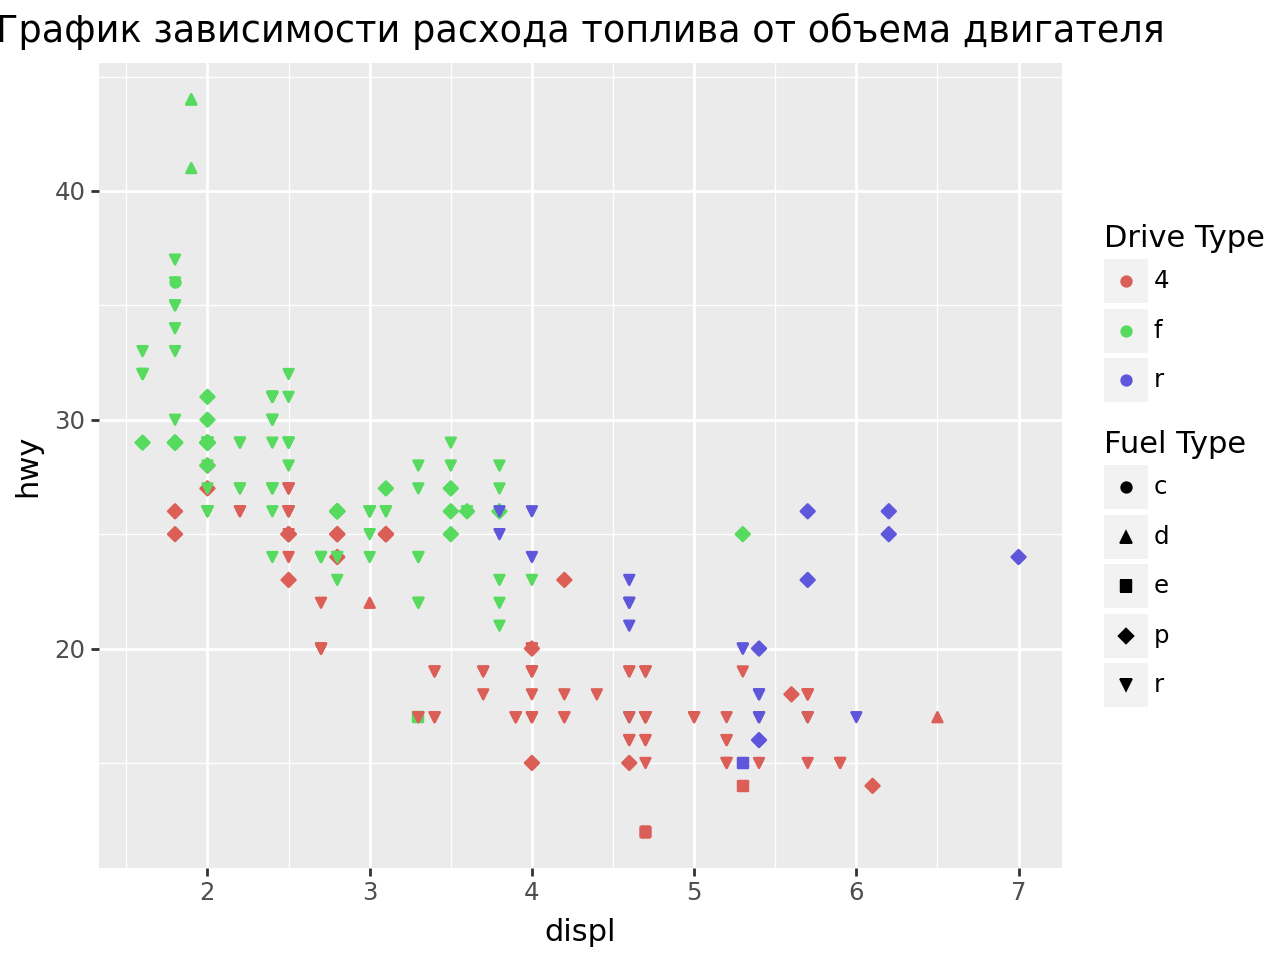

In [15]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", color="drv", shape="fl")) +\
labs(color="Drive Type", shape="Fuel Type") +\
ggtitle("График зависимости расхода топлива от объема двигателя")


## Использование панелей при визуализации

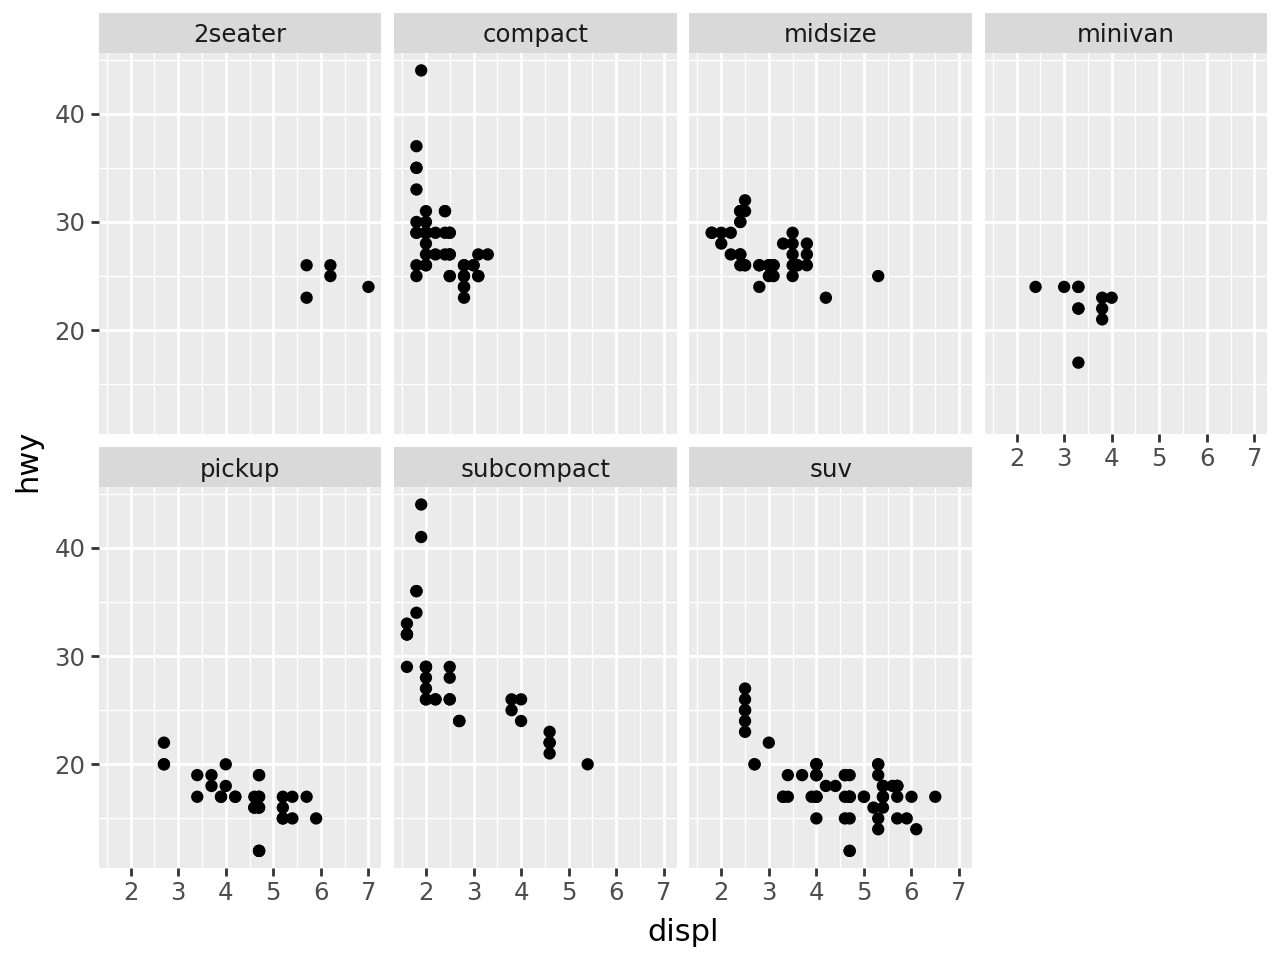

In [16]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_wrap("class", nrow=2)

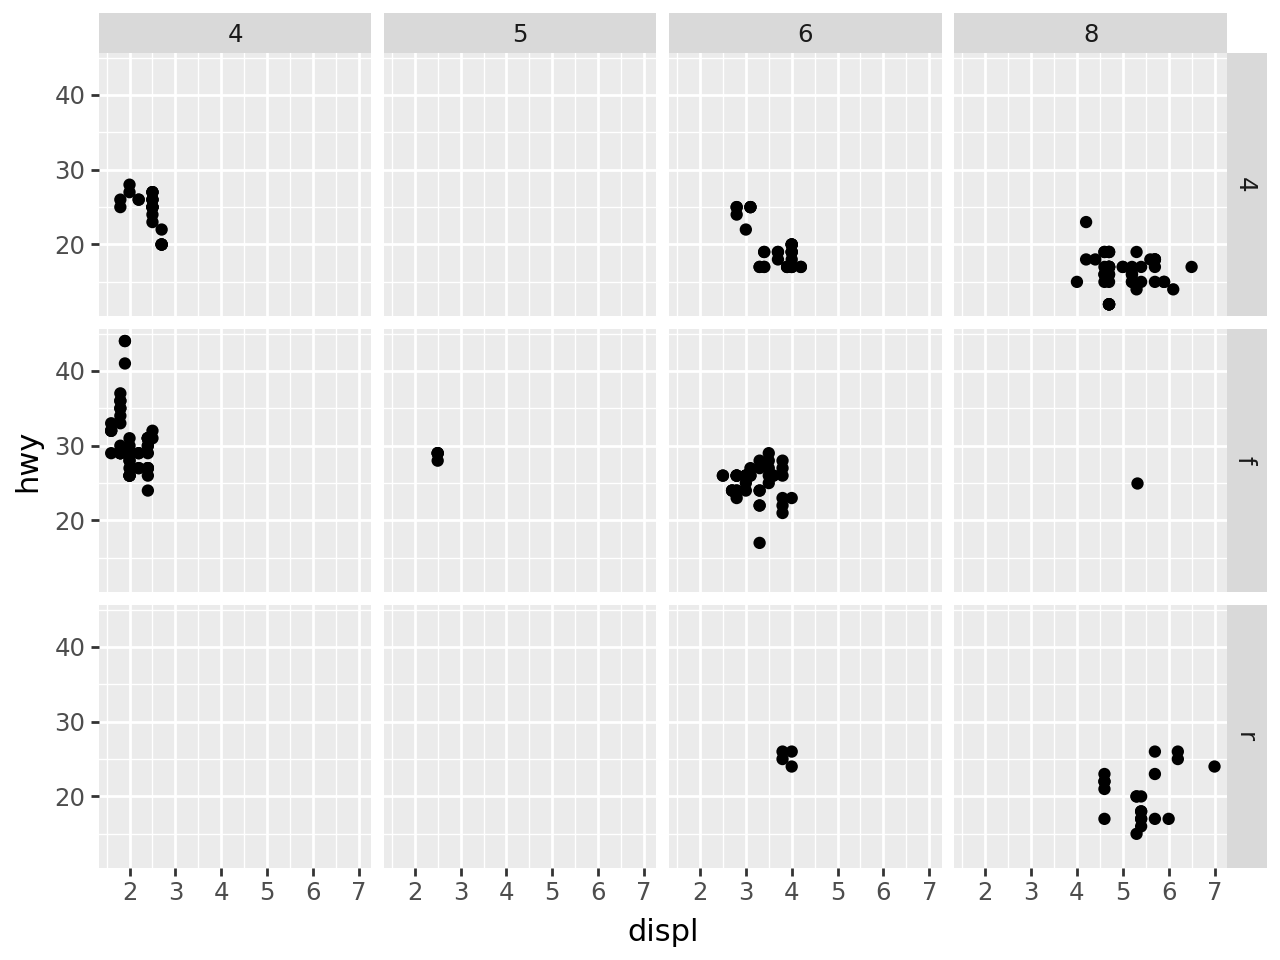

In [17]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_grid("drv ~ cyl")

### Что если использовать категорию с непрерывными значениями (например, hwy) для разделения на панели?

In [18]:
mpg['hwy_category'] = pd.cut(mpg['hwy'], bins=[10,20,30,40], labels=['10-20', '20-30', '30-40'])

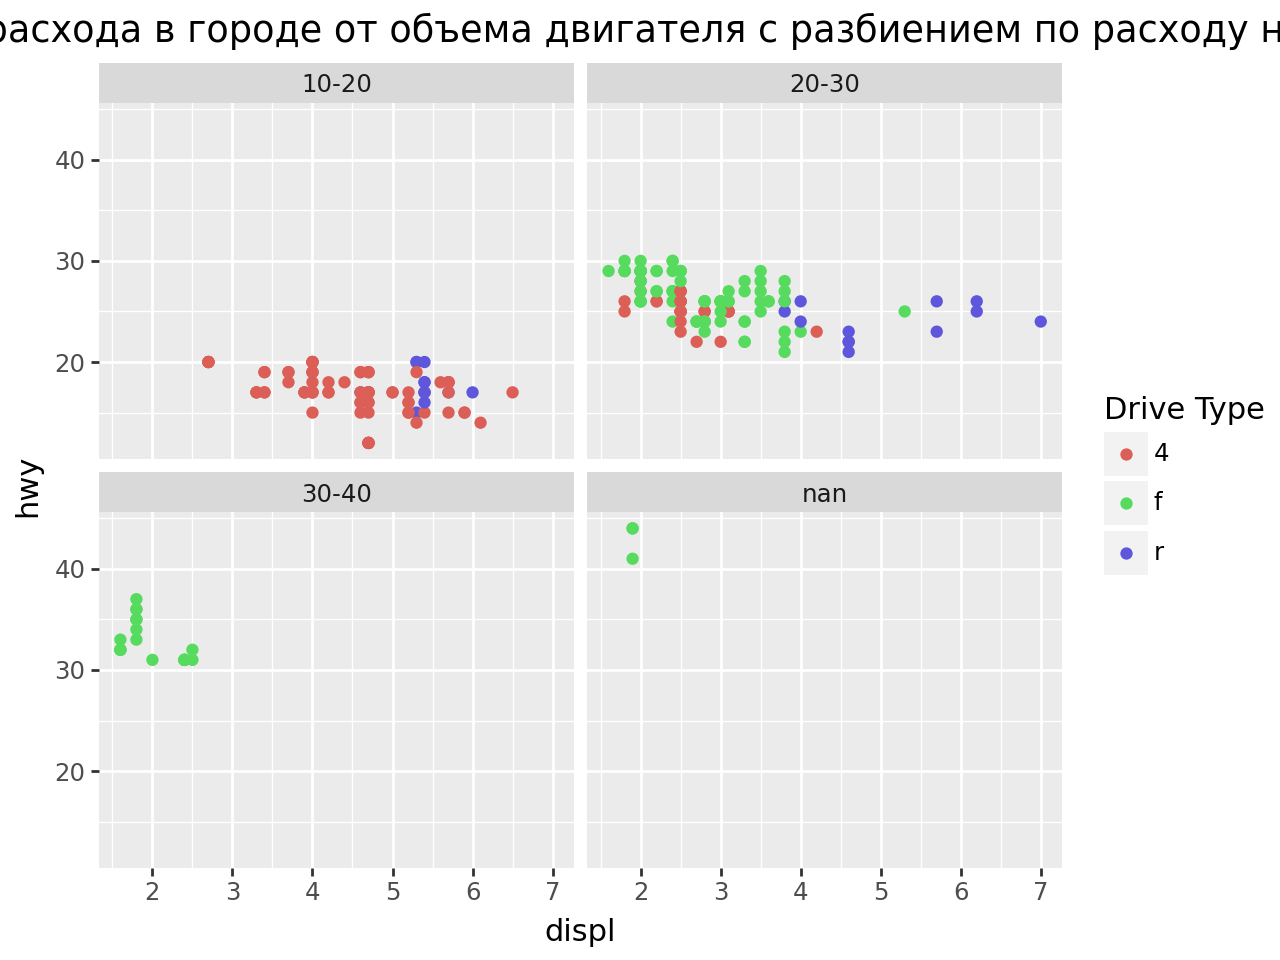

In [19]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", color = 'drv')) +\
facet_wrap('hwy_category') +\
labs(color='Drive Type') +\
ggtitle('Зависимость расхода в городе от объема двигателя с разбиением по расходу на шоссе')
    

### Можно сделать только вертикальные или только горизонтальные панели, если использовать конструкцию типа (". ~ <категория>")

### График с вертикальными панелями

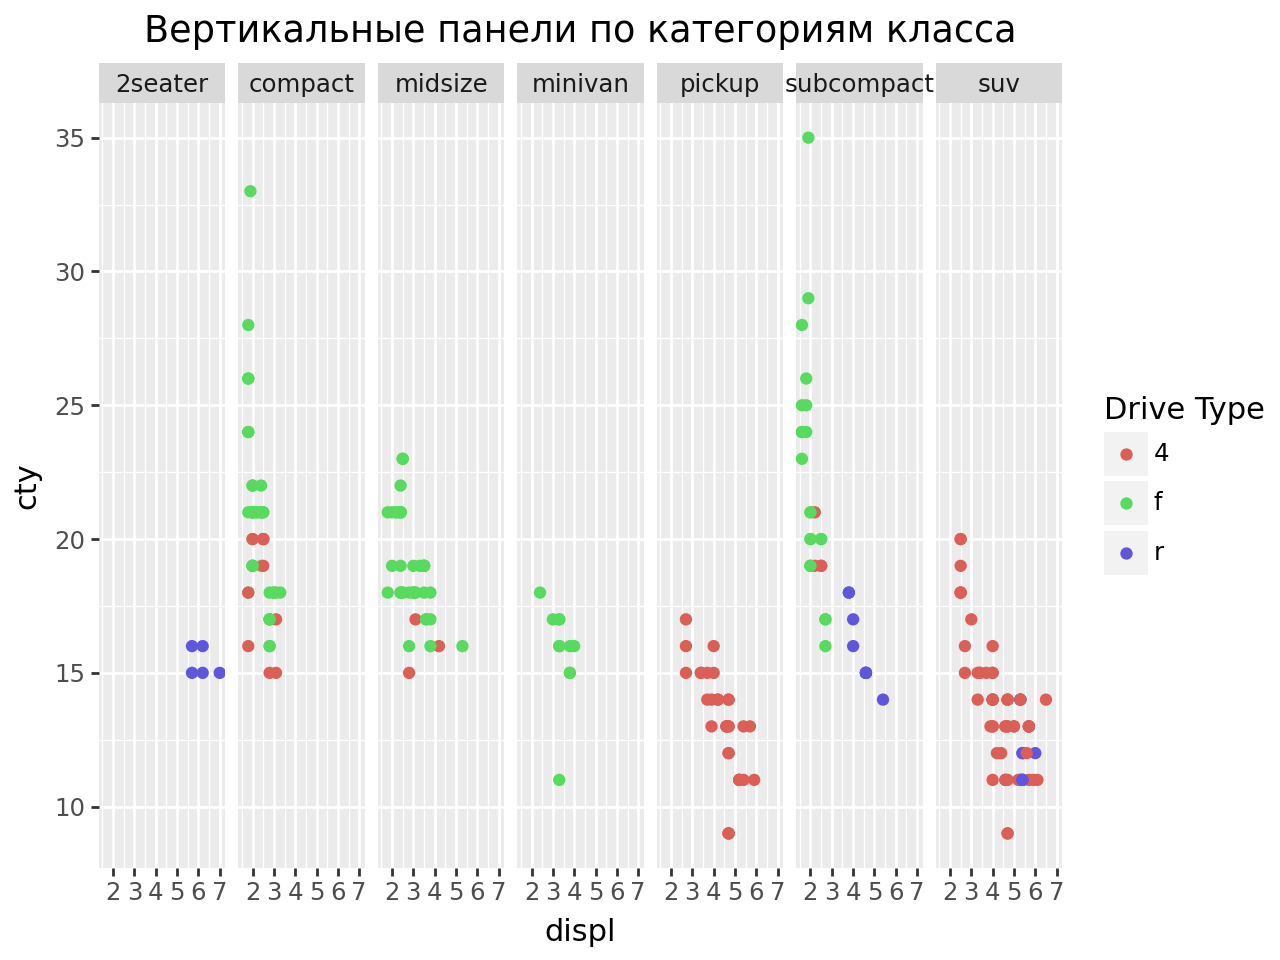

In [20]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="cty", color = 'drv')) +\
facet_grid('. ~ class') +\
labs(color='Drive Type') +\
ggtitle('Вертикальные панели по категориям класса')

### График с горизонтальными панелями

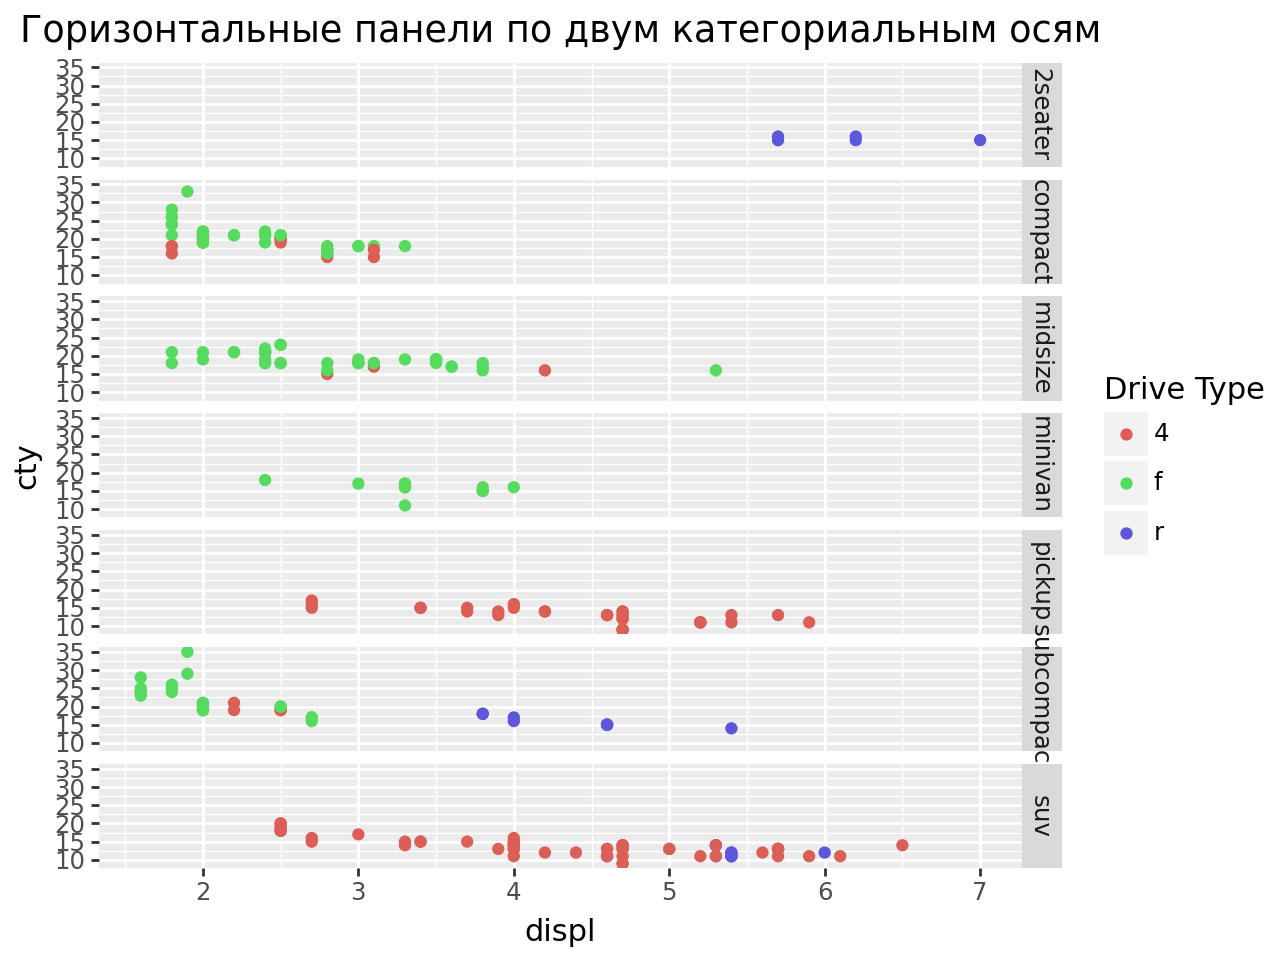

In [21]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="cty", color = 'drv')) +\
facet_grid('class ~ .') +\
labs(color='Drive Type') +\
ggtitle('Горизонтальные панели по двум категориальным осям')

### Что лучше использовать: цвета или панели? А для большого набора?

##### Для небольшого набора данных лучше использовать цвета (лучше различаются категории), а вот при большом датасете лучше разделять на панели с диапазонами (так разделяется датасет -> становится меньше -> и становится лучше читаемым) 

## geom_smooth() позволяет получить сглаженную среднюю (в том числе, с доверительным интервалом).abs
### (это не сработает без библиотеки scikit-misc, и может не сработать даже с ней)

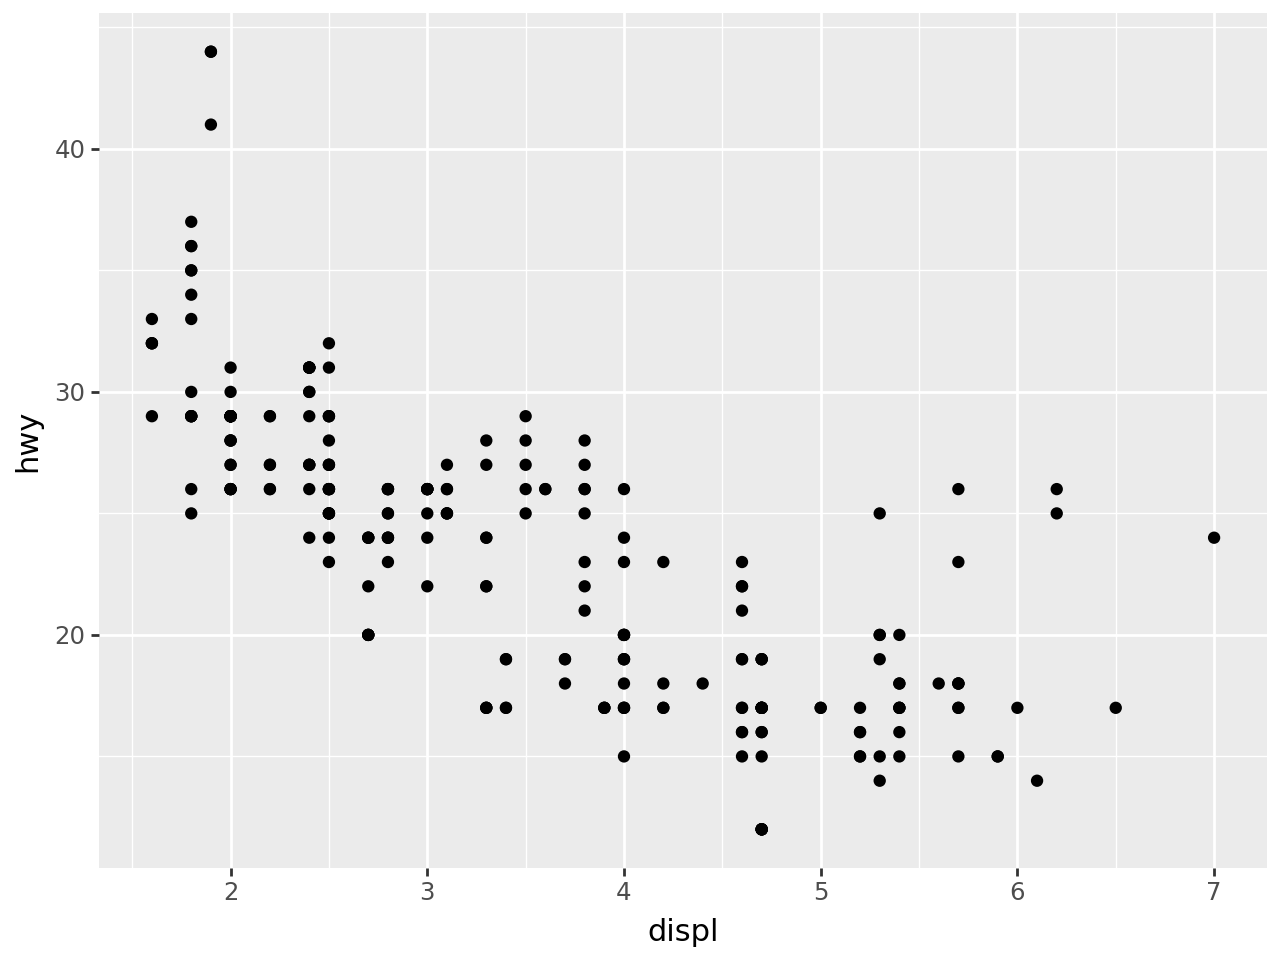

In [22]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

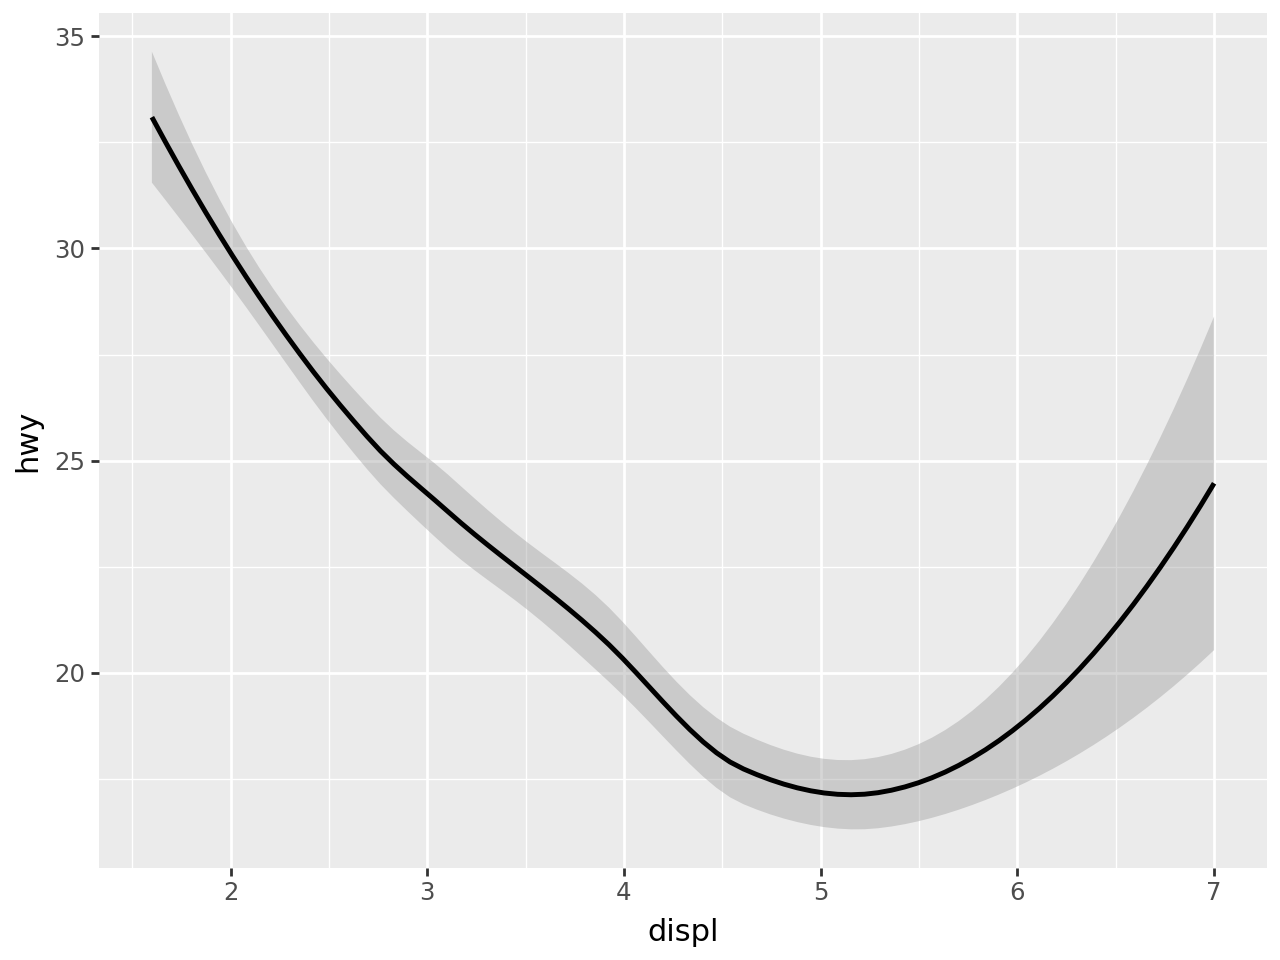

In [23]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy"))

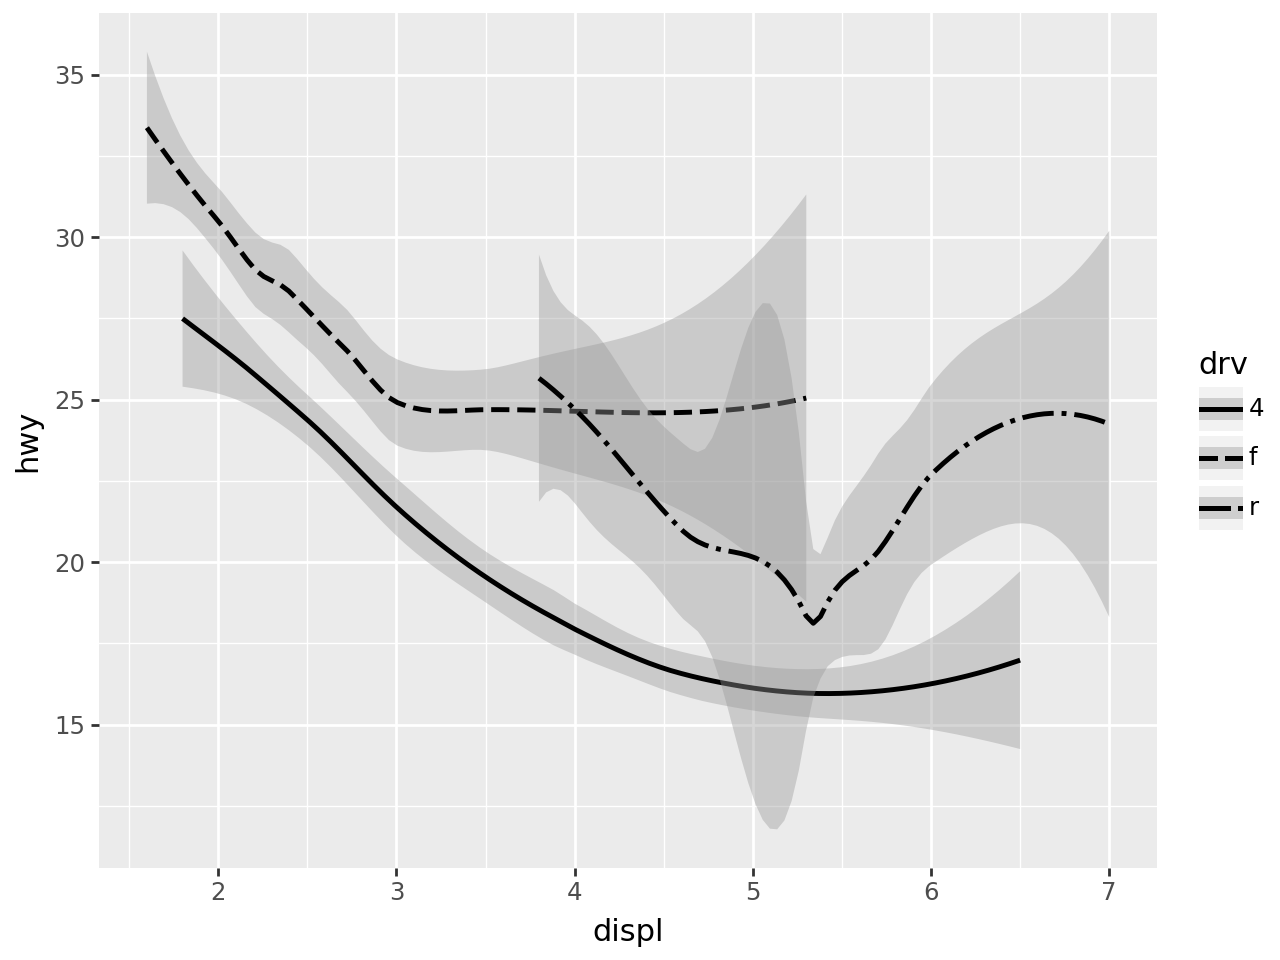

In [24]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy", linetype="drv"))

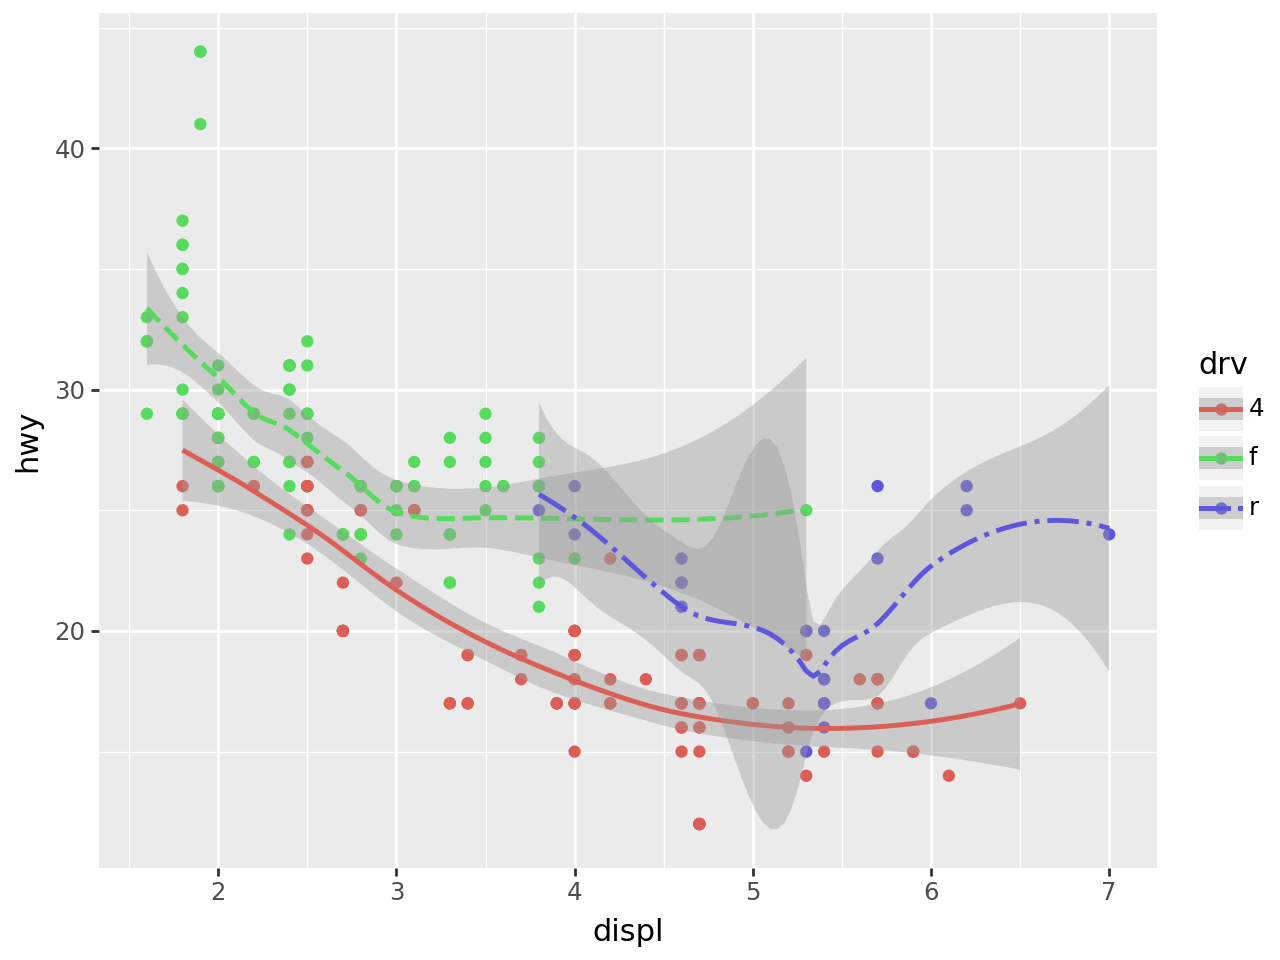

In [25]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) +\
geom_point() +\
geom_smooth(mapping=aes(linetype="drv"))

#### Визуальные отображения в функции ggplot будут распространяться на все графики. Отдельные свойства каждого геометрического отображения будут относиться только к нему.

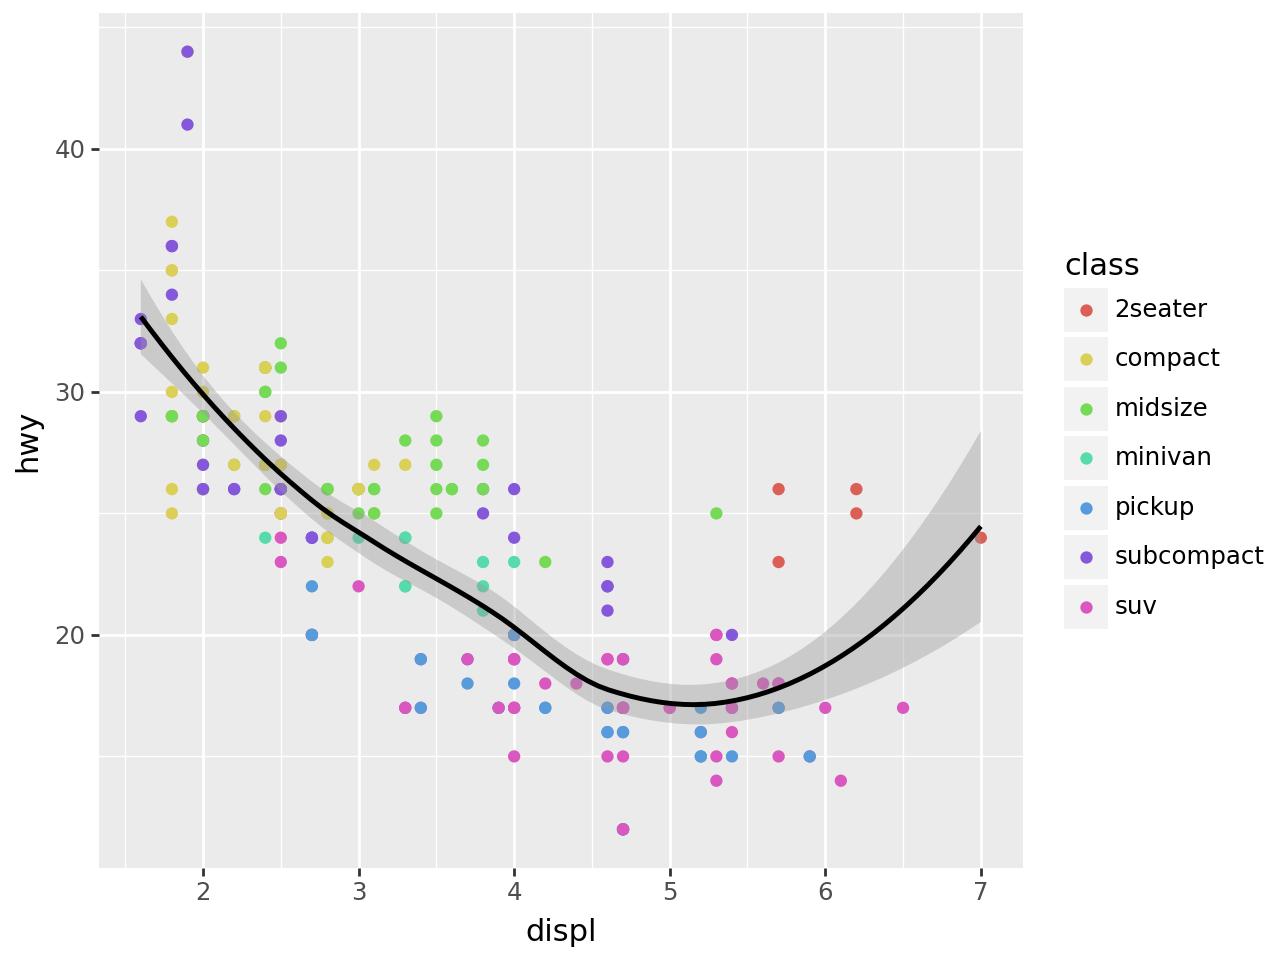

In [26]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth()

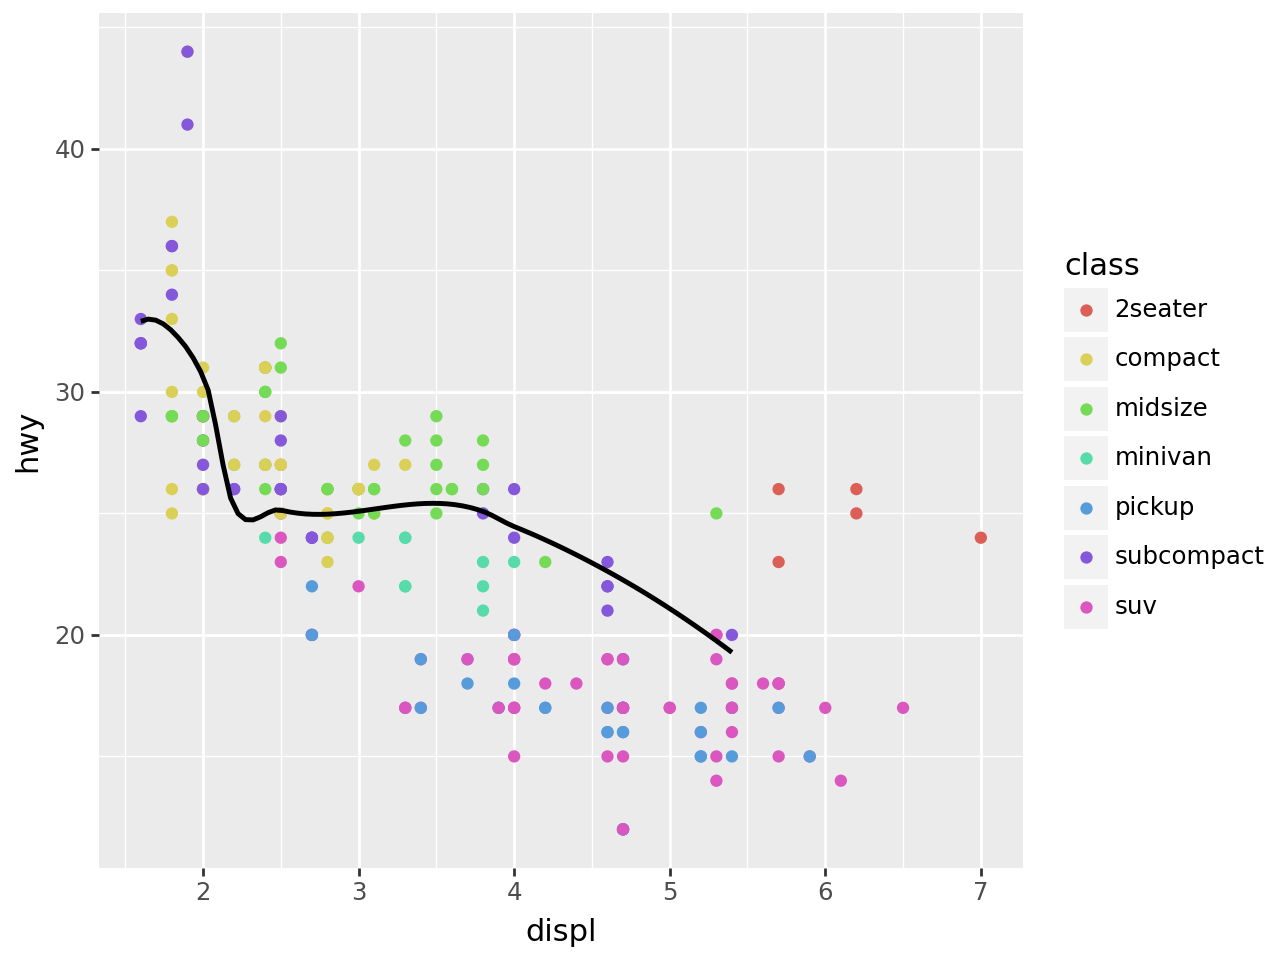

In [27]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth(data=mpg.loc[mpg["class"] == "subcompact"], se=False)

## Попробуйте скомбинировать разные свойства разных слоёв

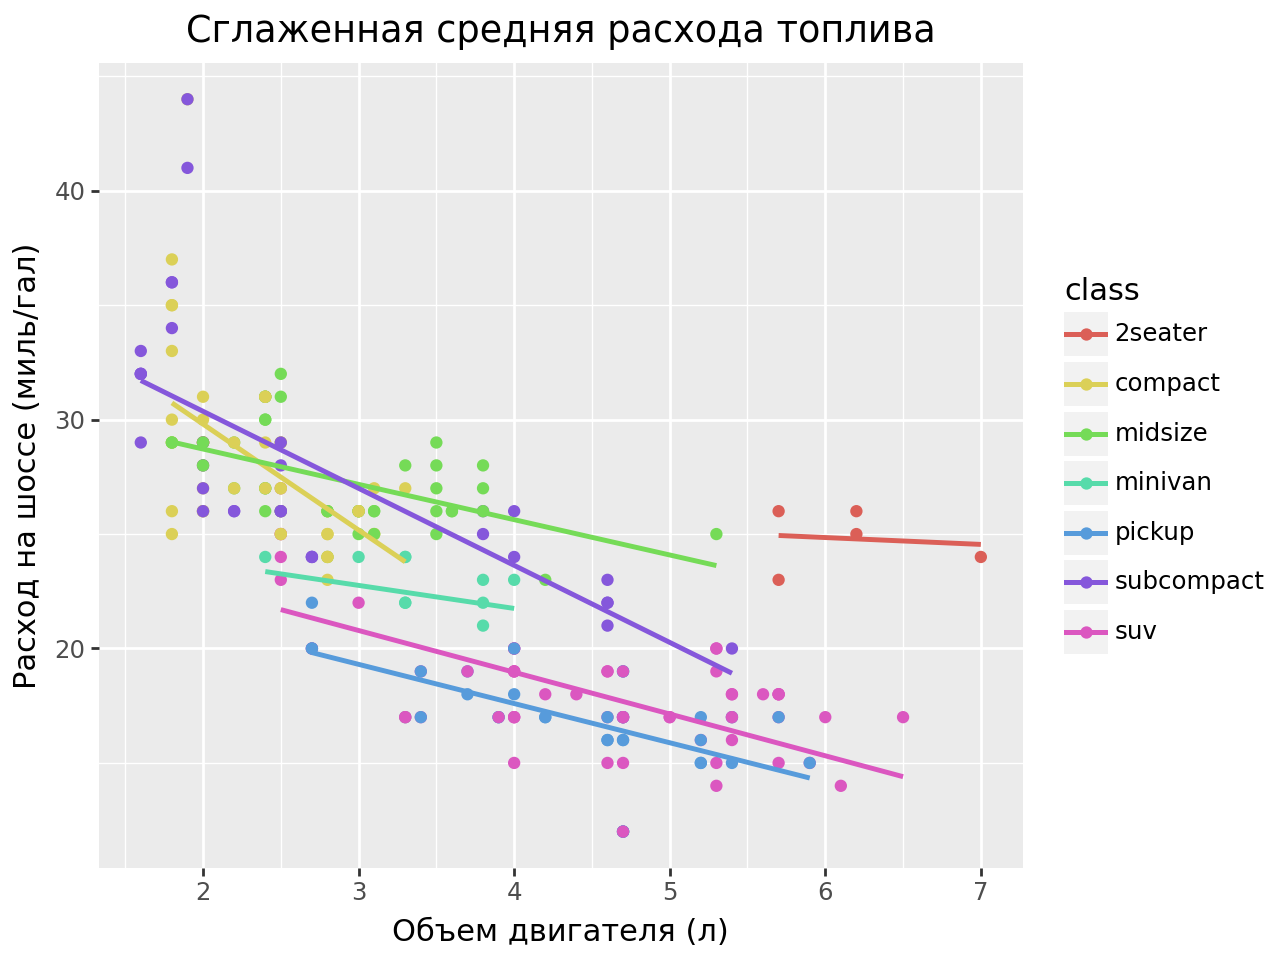

In [28]:
ggplot(mpg, aes(x="displ", y="hwy", color="class")) +\
geom_point() +\
geom_smooth(method="lm", se=False) +\
labs(title="Сглаженная средняя расхода топлива", 
     x = "Объем двигателя (л)", 
     y="Расход на шоссе (миль/гал)")

#### Какое геометрическое отображение вы будете использовать, чтобы нарисовать линейную диаграмму (обычный линейный график)?

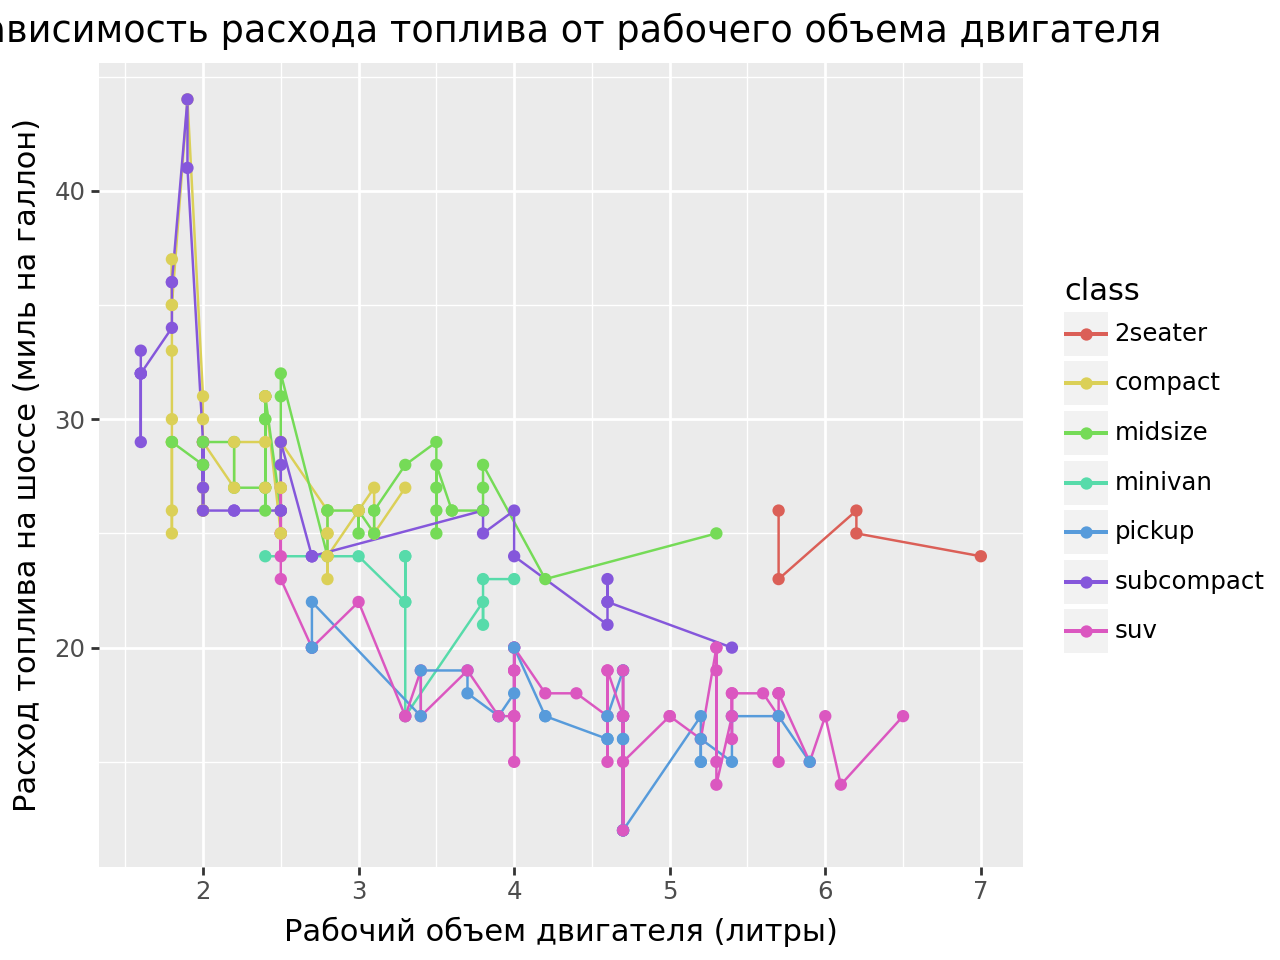

In [29]:
ggplot(mpg, aes(x="displ", y="hwy", color="class")) +\
geom_line() +\
geom_point() +\
labs(title="Зависимость расхода топлива от рабочего объема двигателя", 
     x = "Рабочий объем двигателя (литры)", 
     y="Расход топлива на шоссе (миль на галлон)")

### Подберите подходящий код под следующие графики:
<img src="supp/p1.png" alt="Drawing" style="width: 350px;"/>
<img src="supp/p2.png" alt="Drawing" style="width: 350px;"/></br>
<img src="supp/p3.png" alt="Drawing" style="width: 350px;"/>
<img src="supp/p4.png" alt="Drawing" style="width: 350px;"/></br>
<img src="supp/p5.png" alt="Drawing" style="width: 350px;"/>
<img src="supp/p6.png" alt="Drawing" style="width: 350px;"/>

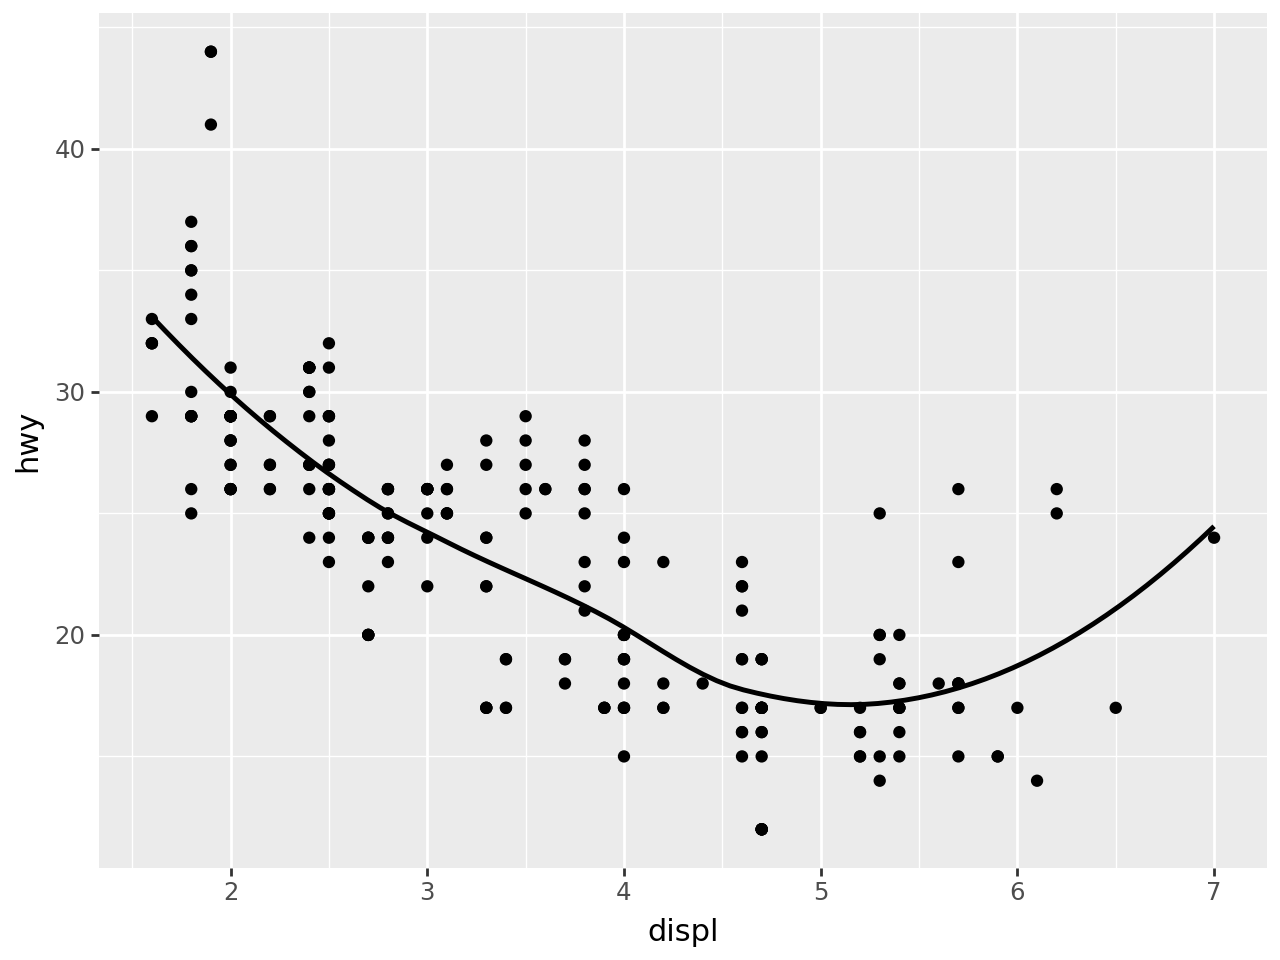

In [30]:
ggplot(mpg, aes(x='displ', y='hwy')) +\
geom_point() +\
geom_smooth(method='loess', se=False) 

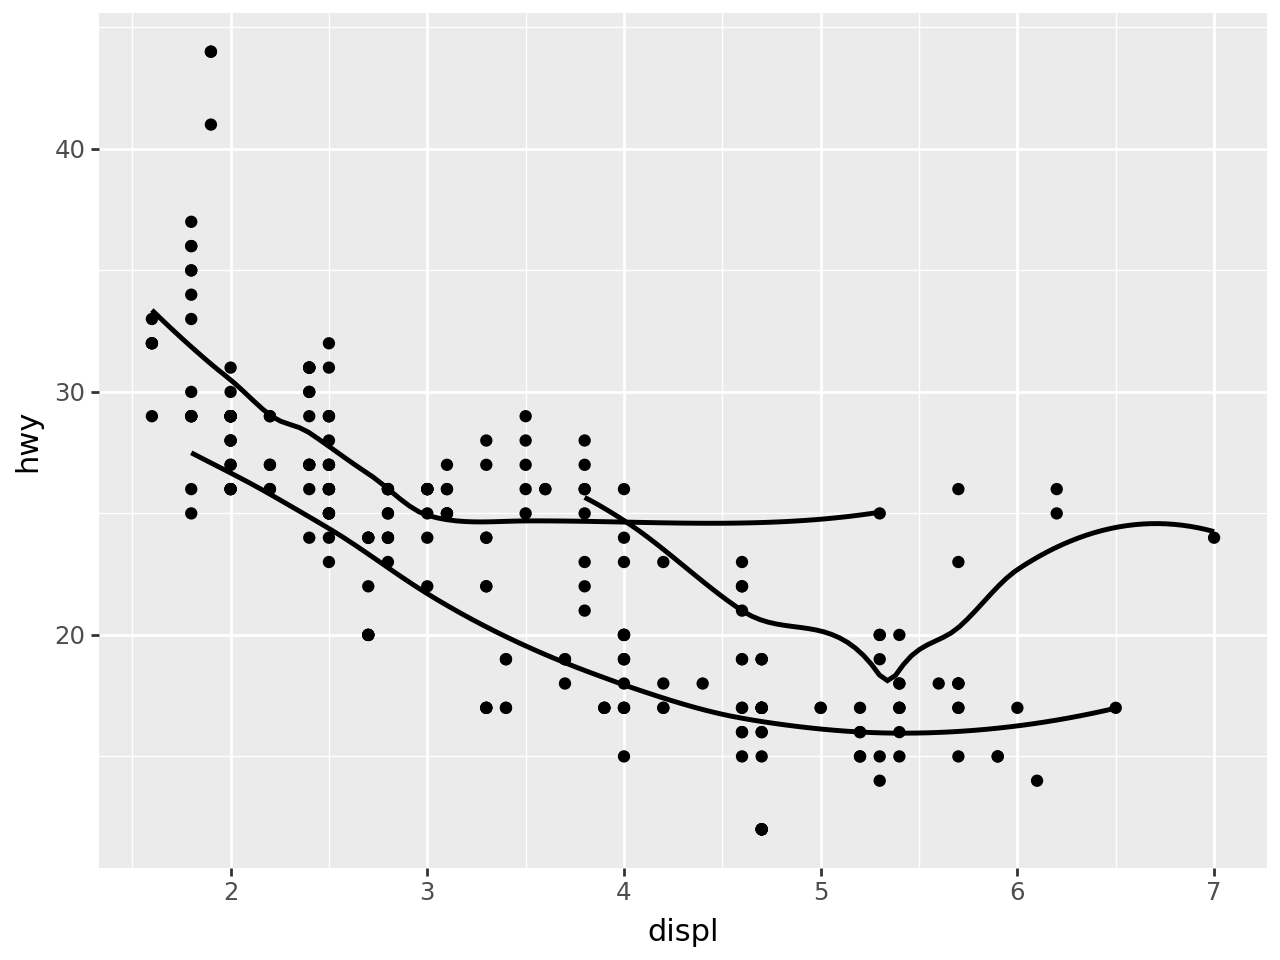

In [31]:
ggplot(mpg, aes(x='displ', y='hwy', group='drv')) +\
geom_point() +\
geom_smooth(method='loess', linetype='solid', se=False)  

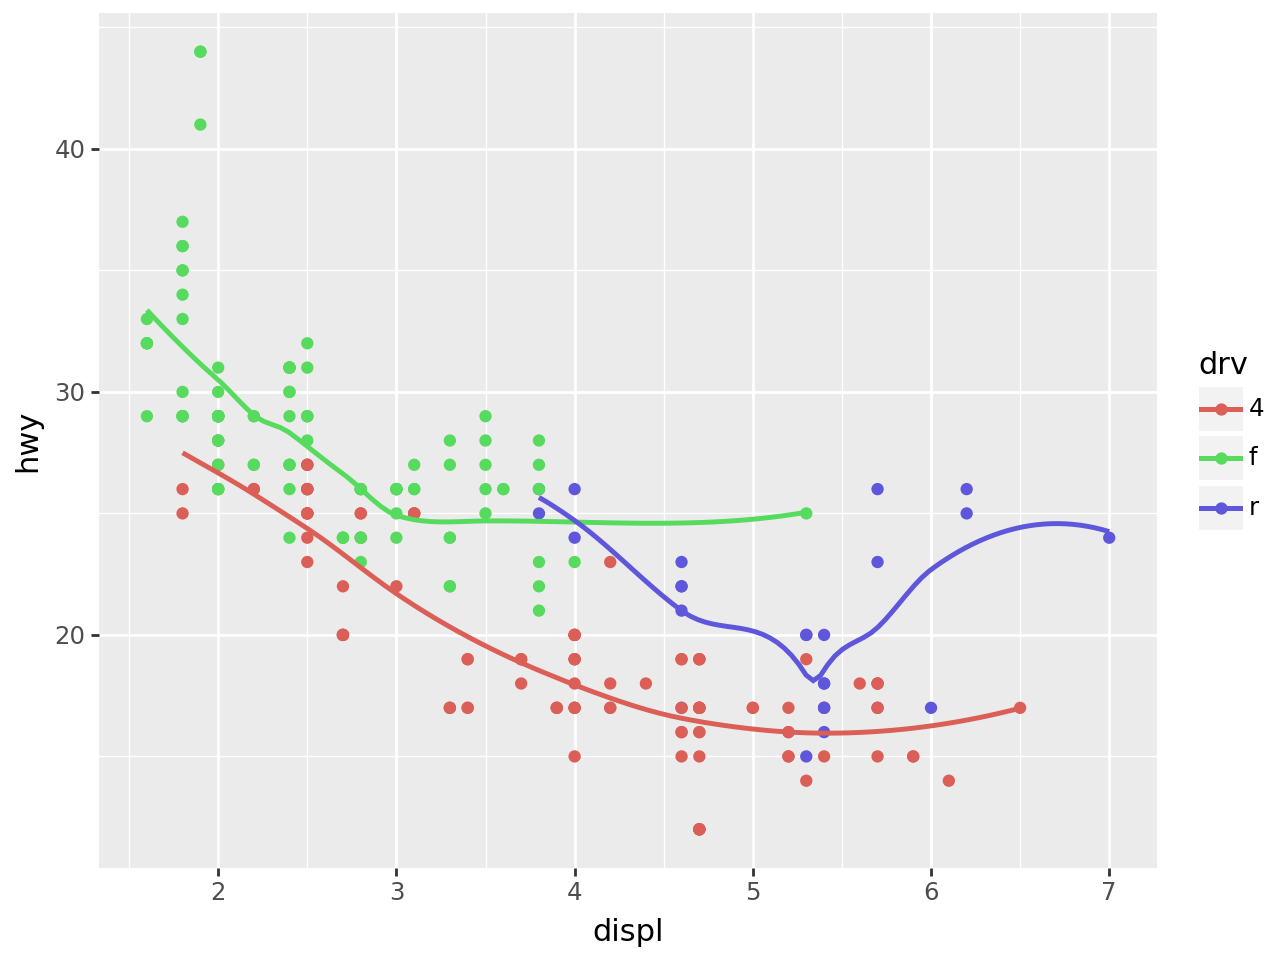

In [32]:
ggplot(mpg, aes(x='displ', y='hwy', color = 'drv')) +\
geom_point() +\
geom_smooth(linetype="solid", se=False)

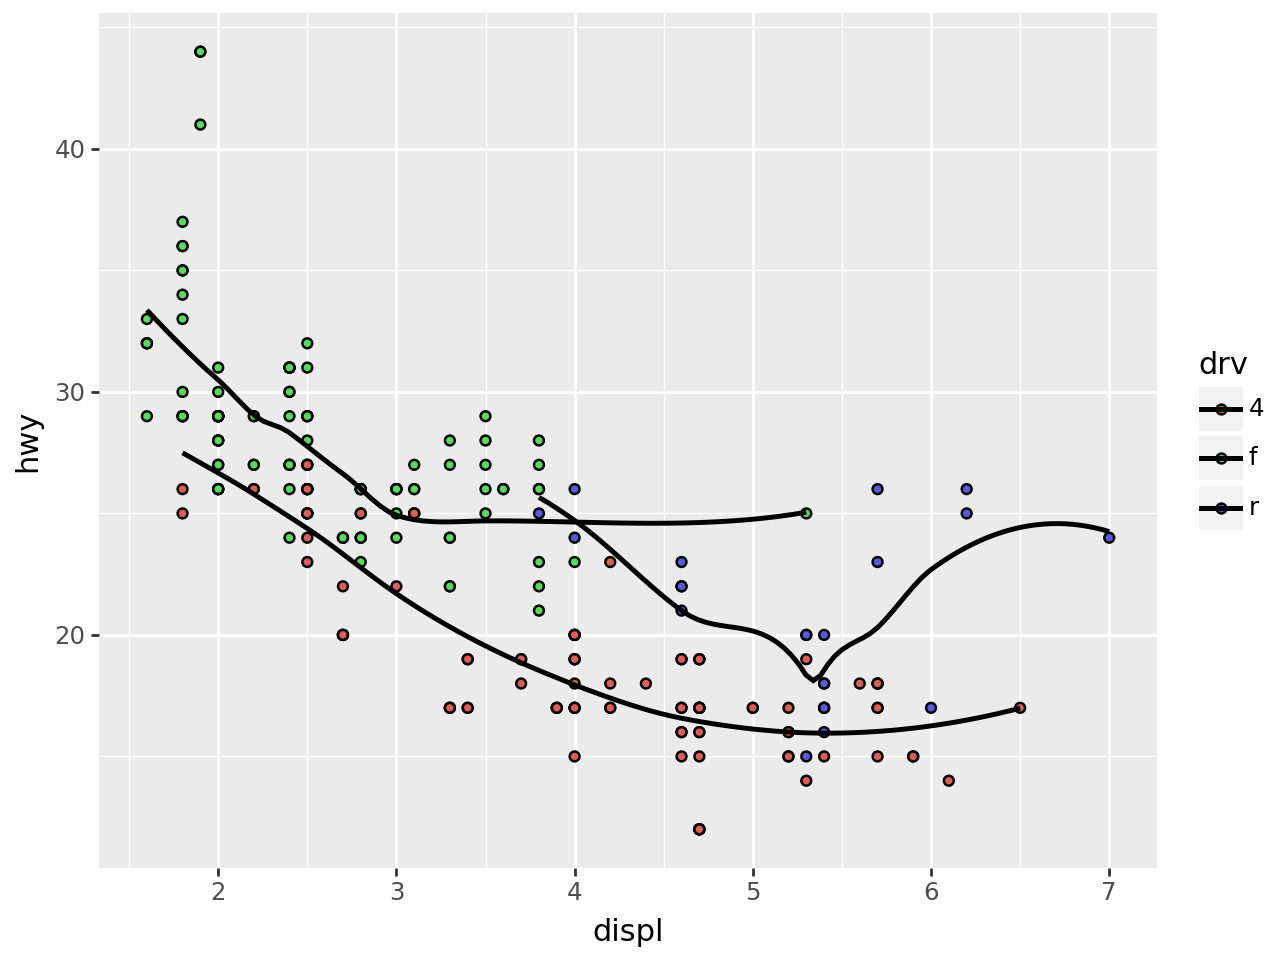

In [33]:
ggplot(mpg, aes(x='displ', y='hwy', fill='drv')) +\
geom_point() +\
geom_smooth(method='loess', se=False) 

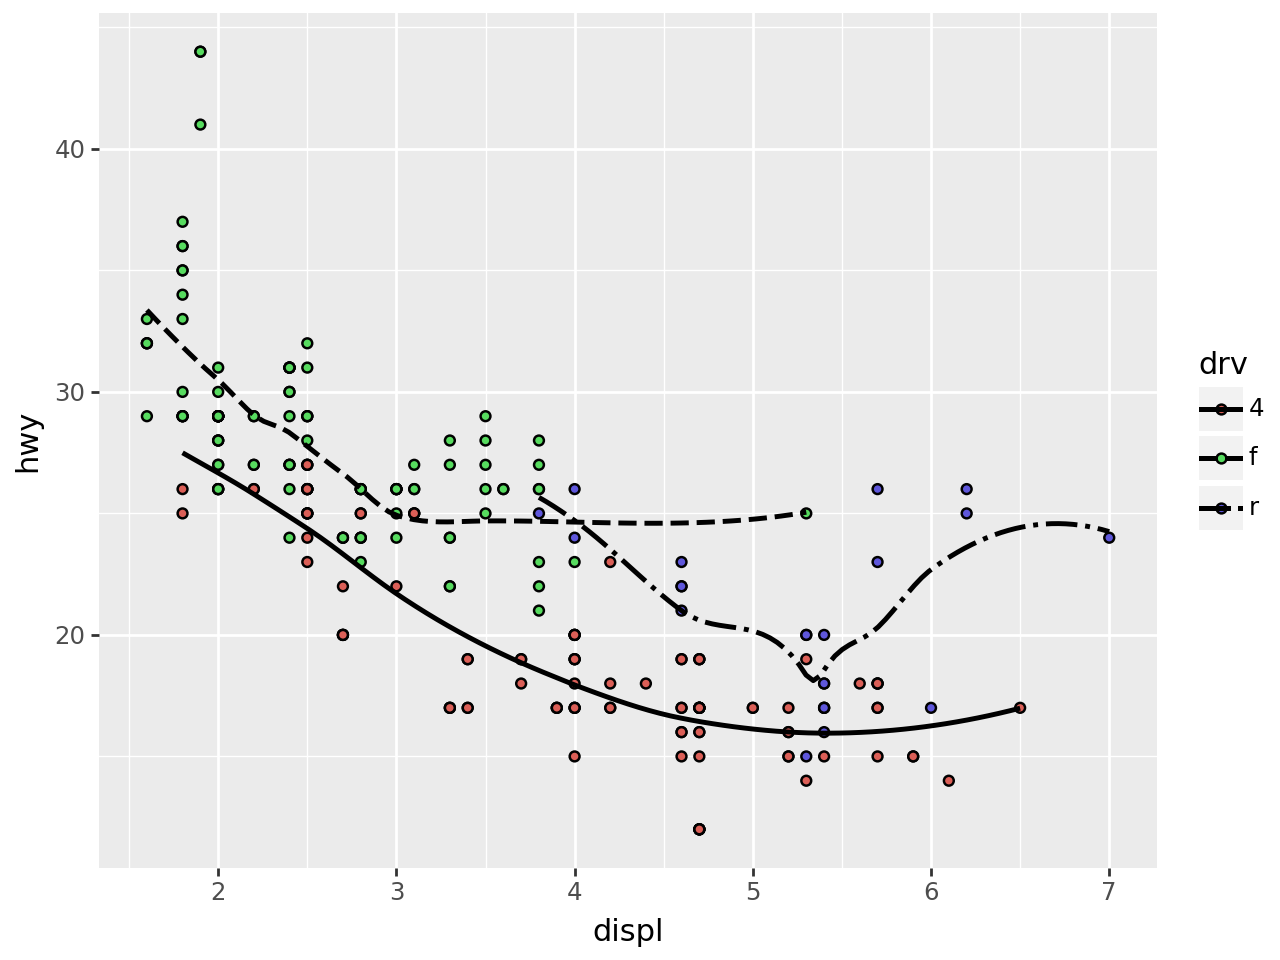

In [34]:
ggplot(mpg, aes(x='displ', y='hwy', fill = 'drv')) +\
geom_point() +\
geom_smooth(mapping=aes(linetype="drv"), se=False)

/home/vlad/3_Semestr/Data Visualization/Labs/vis_engine/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


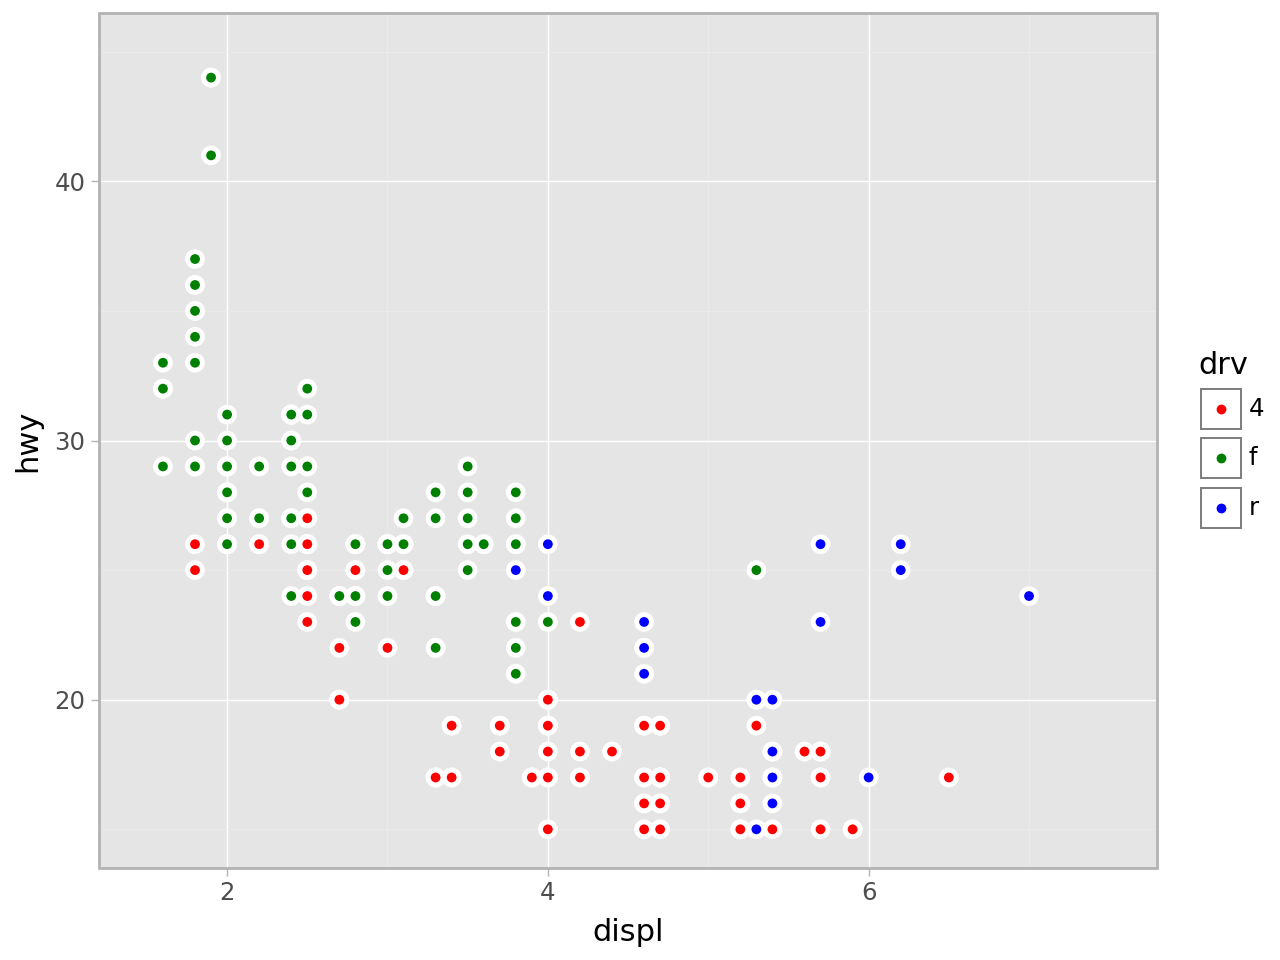

In [35]:
(ggplot(mpg, aes(x='displ', y='hwy', fill='drv')) 
 + geom_point(size=2, stroke=1, color='white')      
 + scale_fill_manual(values=['red', 'green', 'blue'])  
 + theme_light()
 + theme(
     panel_background=element_rect(fill='#E5E5E5'),
     panel_grid_major=element_line(color='white', )
 )
 + labs(x='displ', y='hwy')
 + scale_y_continuous(limits=[15, 45], breaks=range(20, 45, 10))
 + scale_x_continuous(limits=[1.5, 7.5])
)

## Статистические свойства элементов категорий

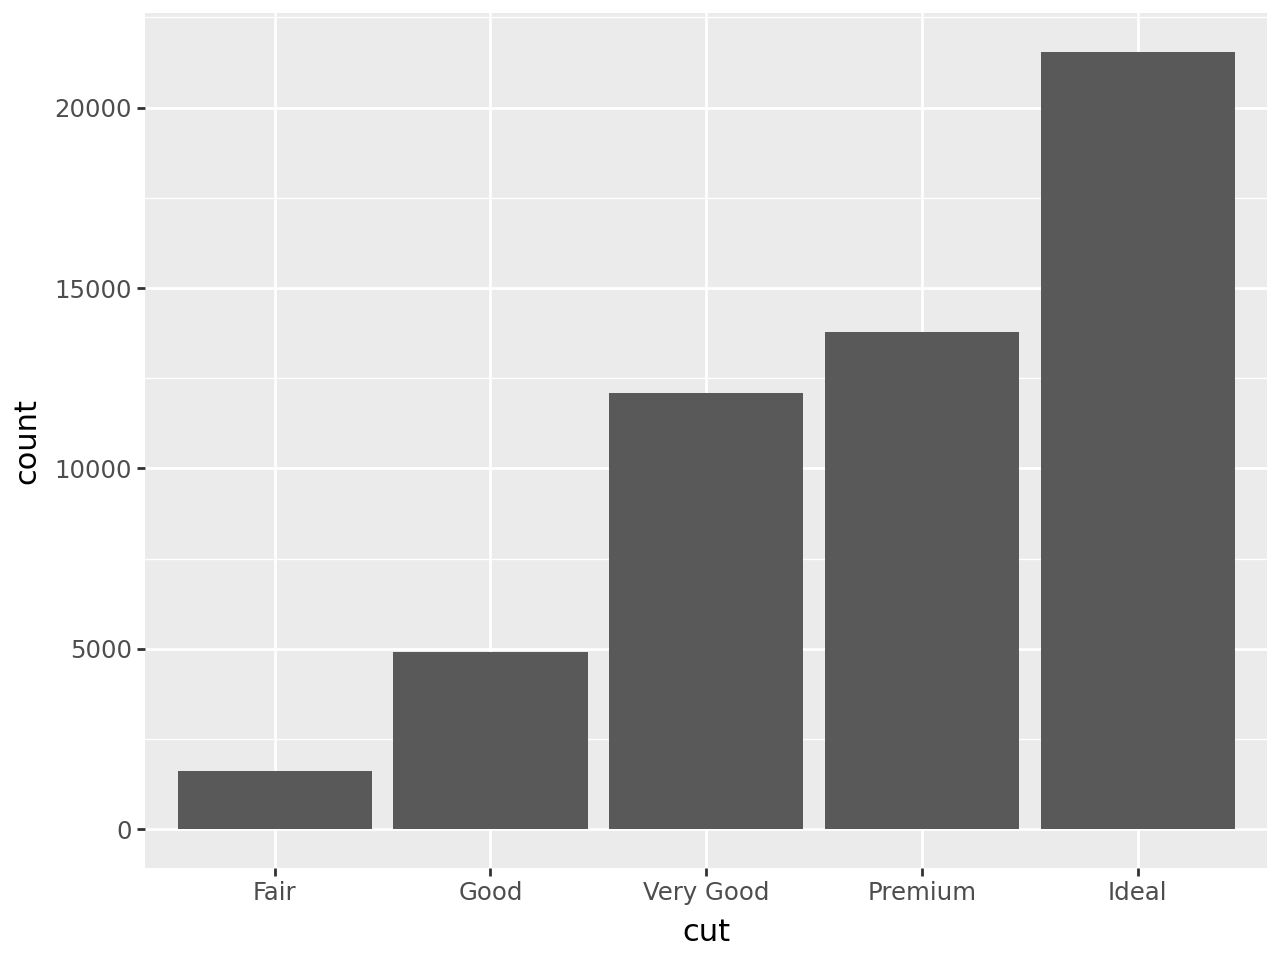

In [36]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut"))

### Что делает geom_col()? Чем он отличается от geom_bar()?

#### "geom_col" - использзуется для создания столбчатых диаграмм, где высота столбца задается непрерывной переменной
#### "geom_bar" - использзуется для создания гистограмм или столбчатых диаграмм , где высота определяется частотой или количеством наблюдений

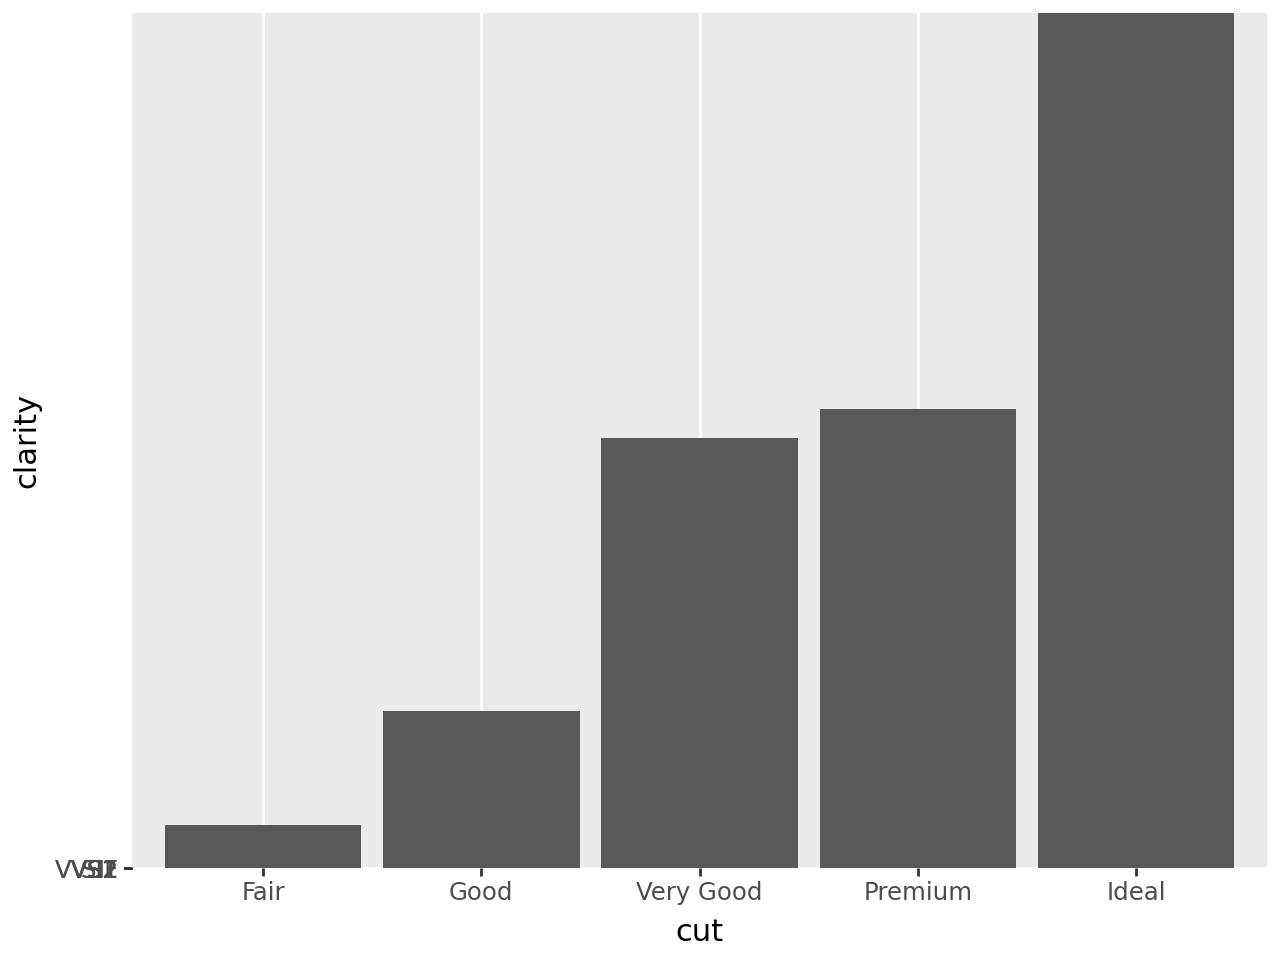

In [37]:
ggplot(data=diamonds) +\
geom_col(mapping=aes(x="cut", y="clarity"))

### Что произойдёт, если 
'ggplot(data=diamonds) +\
'geom_bar(mapping=aes(x="cut", y="..prop.."), group=1)
или
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="color", y="..prop.."))
### запустить без "group=1"? Почему?

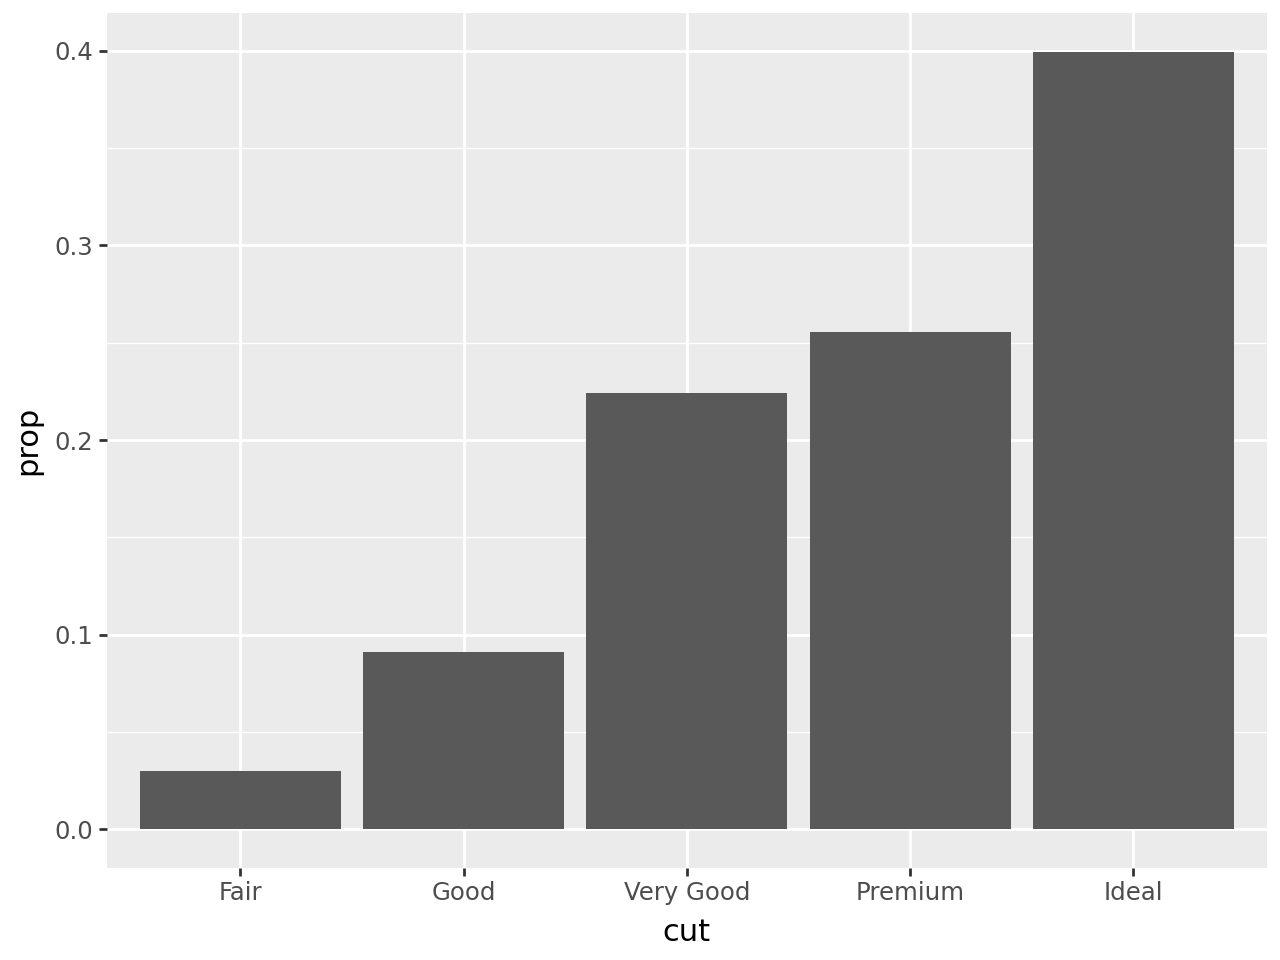

In [38]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", y="..prop.."), group=1)

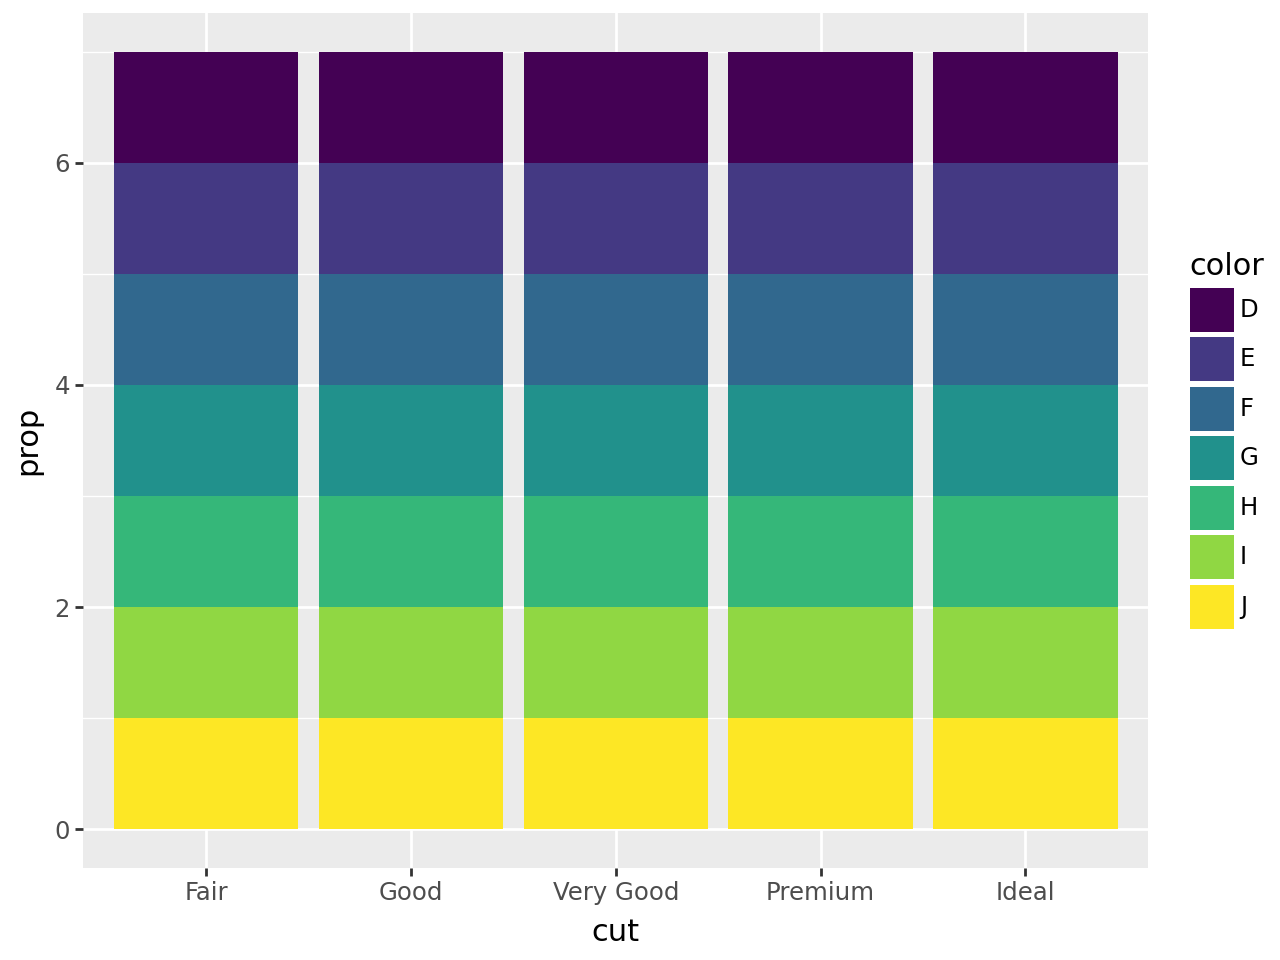

In [39]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="color", y="..prop.."))

В первом случае, когда вы используете `group = 1`, это указывает ggplot2, что все данные должны быть сгруппированы вместе для расчета пропорций. То есть, все строки данных для каждого значения в столбце "cut" будут рассматриваться как часть одной группы, и для каждой категории будет рассчитана относительная частота, которая отображается как высота столбца.

Во втором случае, без `group = 1`, ggplot2 пытается автоматически группировать данные на основе других факторов, таких как цвет. Так как `fill = "color"`, ggplot2 рассматривает переменную `color` как дополнительный фактор, и вычисляет пропорции для каждой комбинации значений `cut` и `color`.

## Модные графики с красивыми цветами

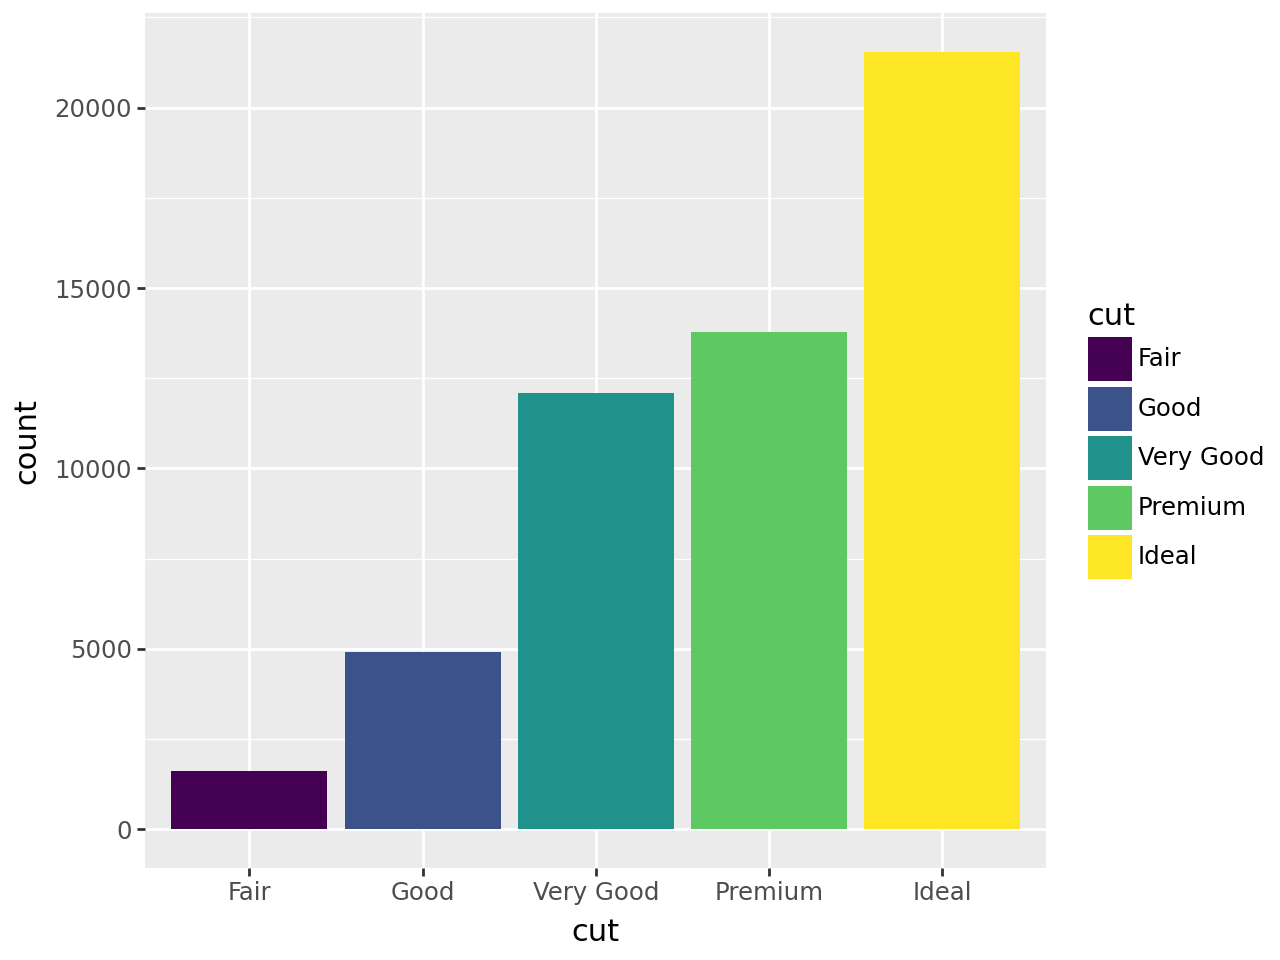

In [40]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="cut"))

## При добавлении новых категорий в качестве цвета появляется новая функциональность

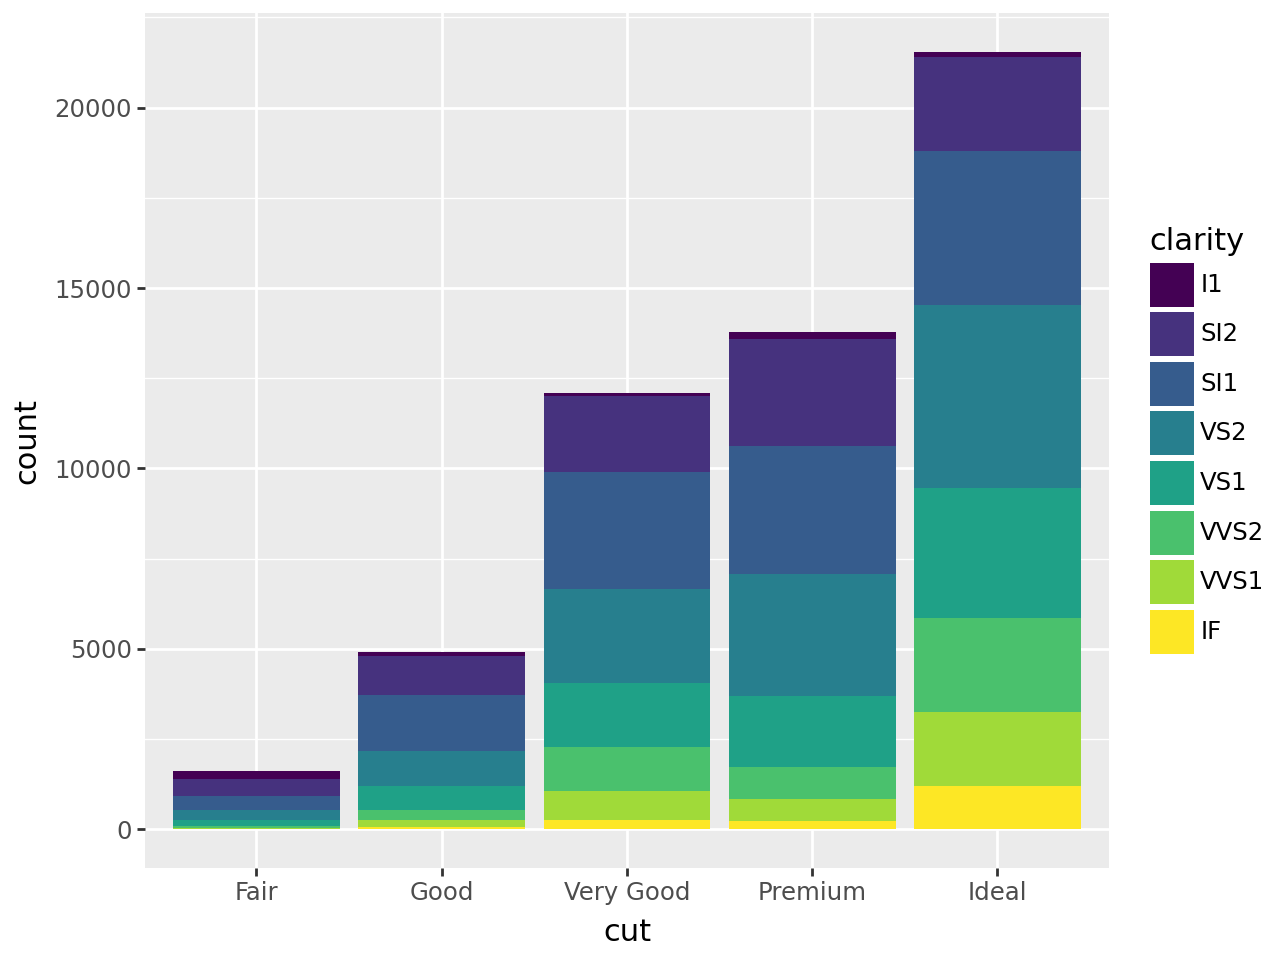

In [41]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"))

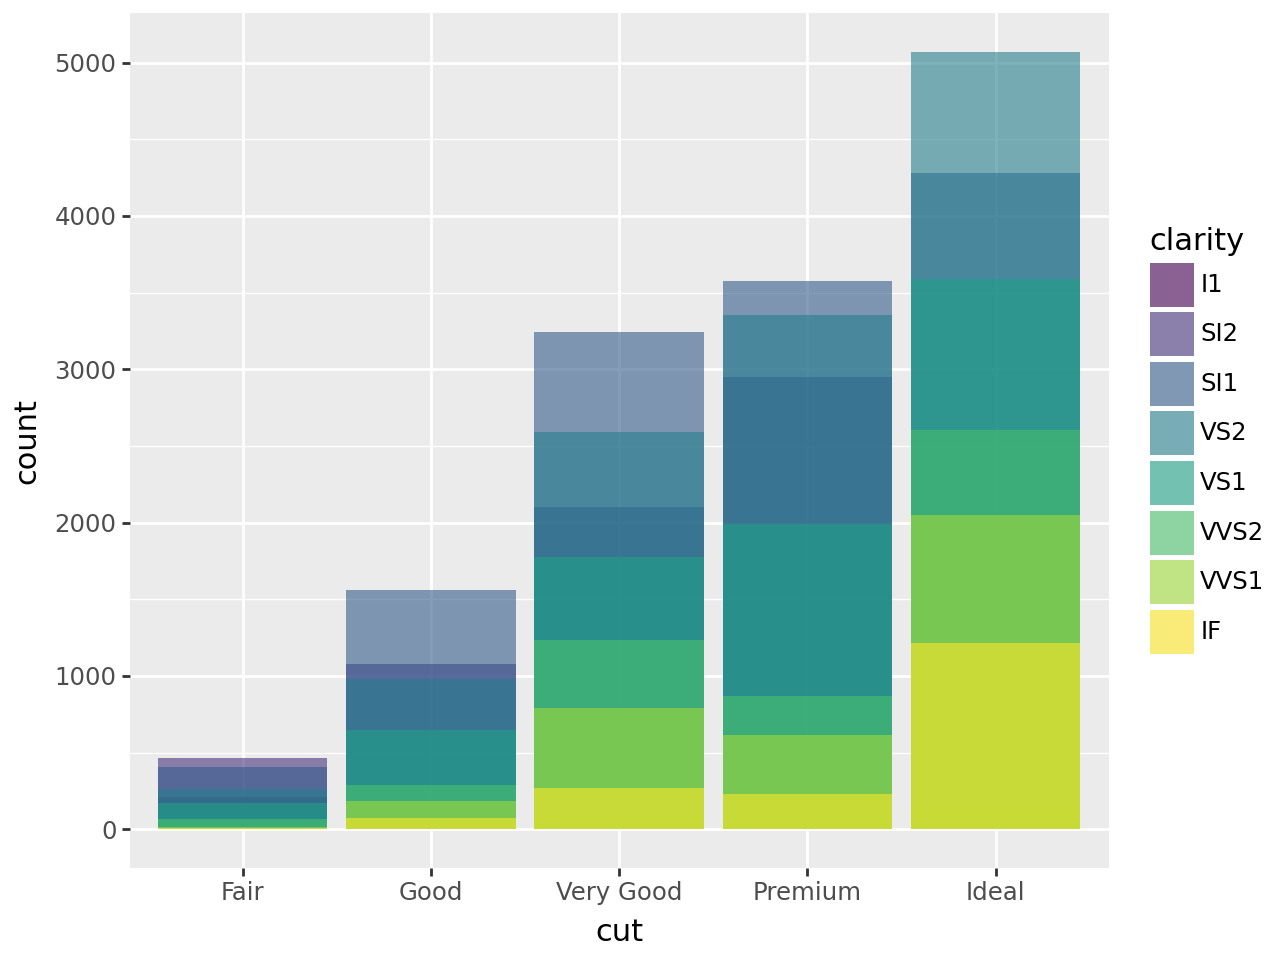

In [42]:
import plotnine as pn

pn.ggplot(data=diamonds, mapping=pn.aes(x='cut', fill='clarity')) + \
    pn.geom_bar(position="identity", alpha=0.6)


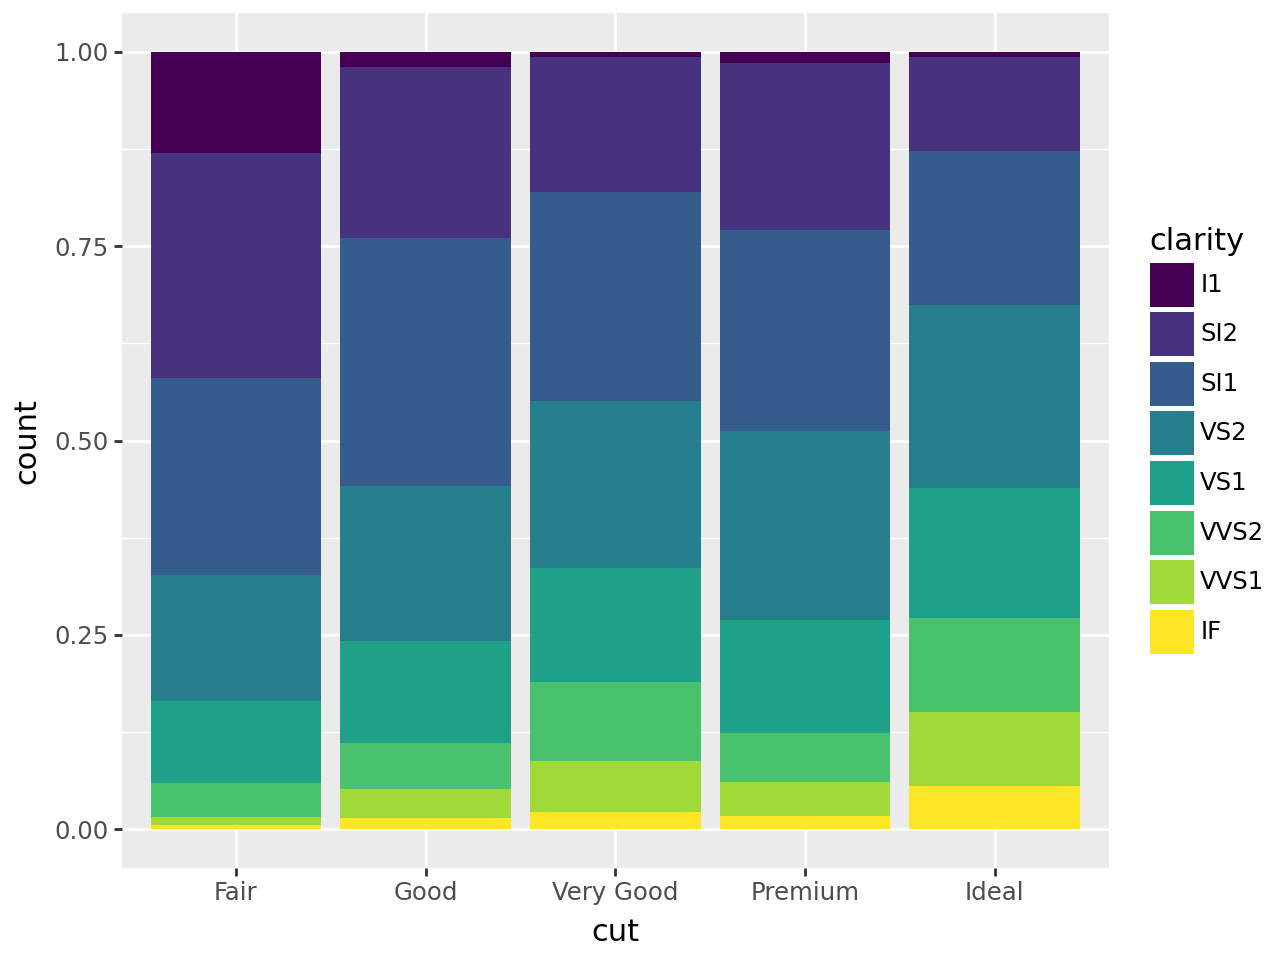

In [43]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="fill")

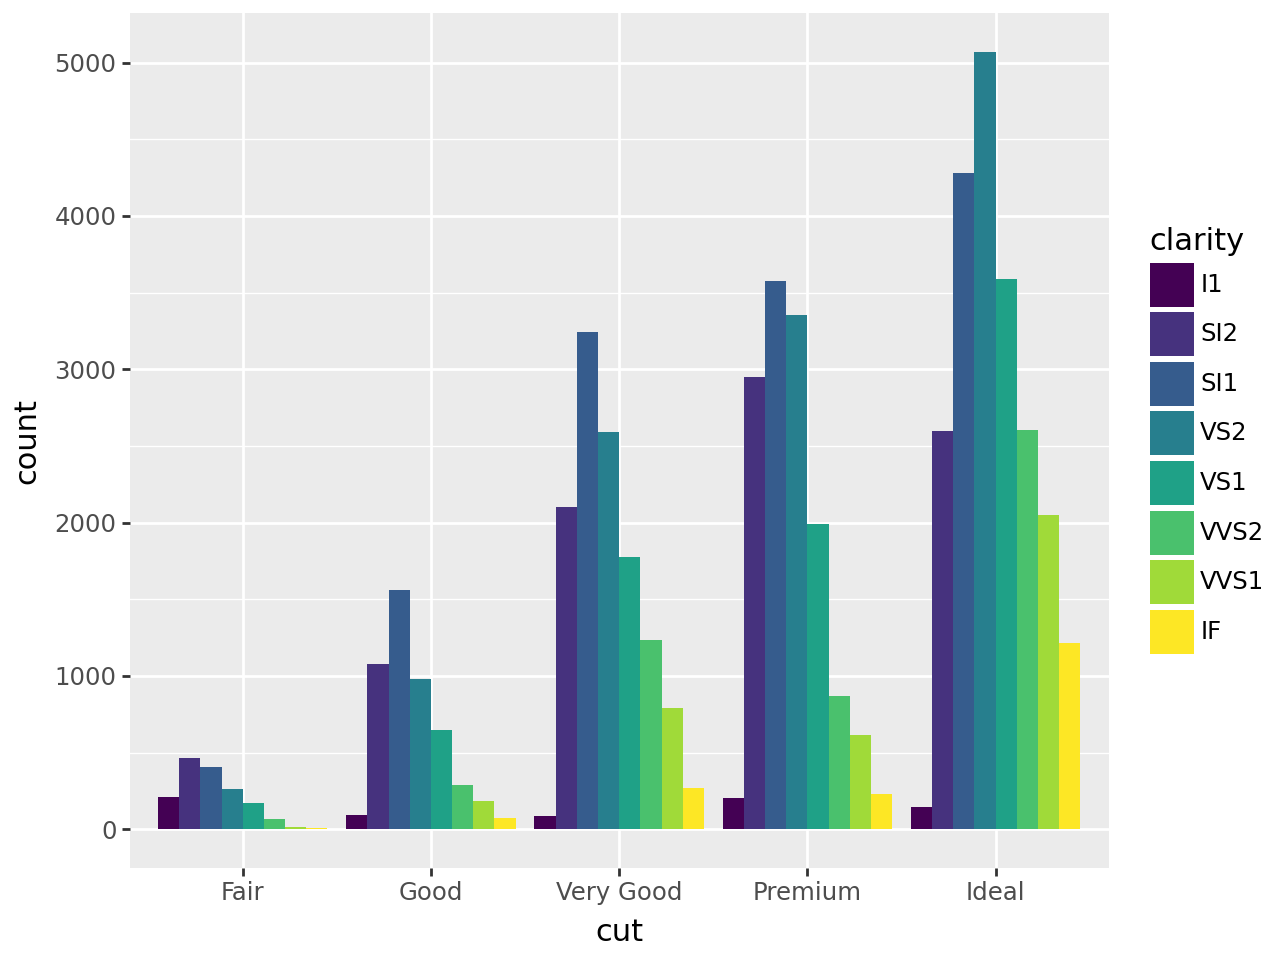

In [44]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")

## Добавим jitter в scatter!

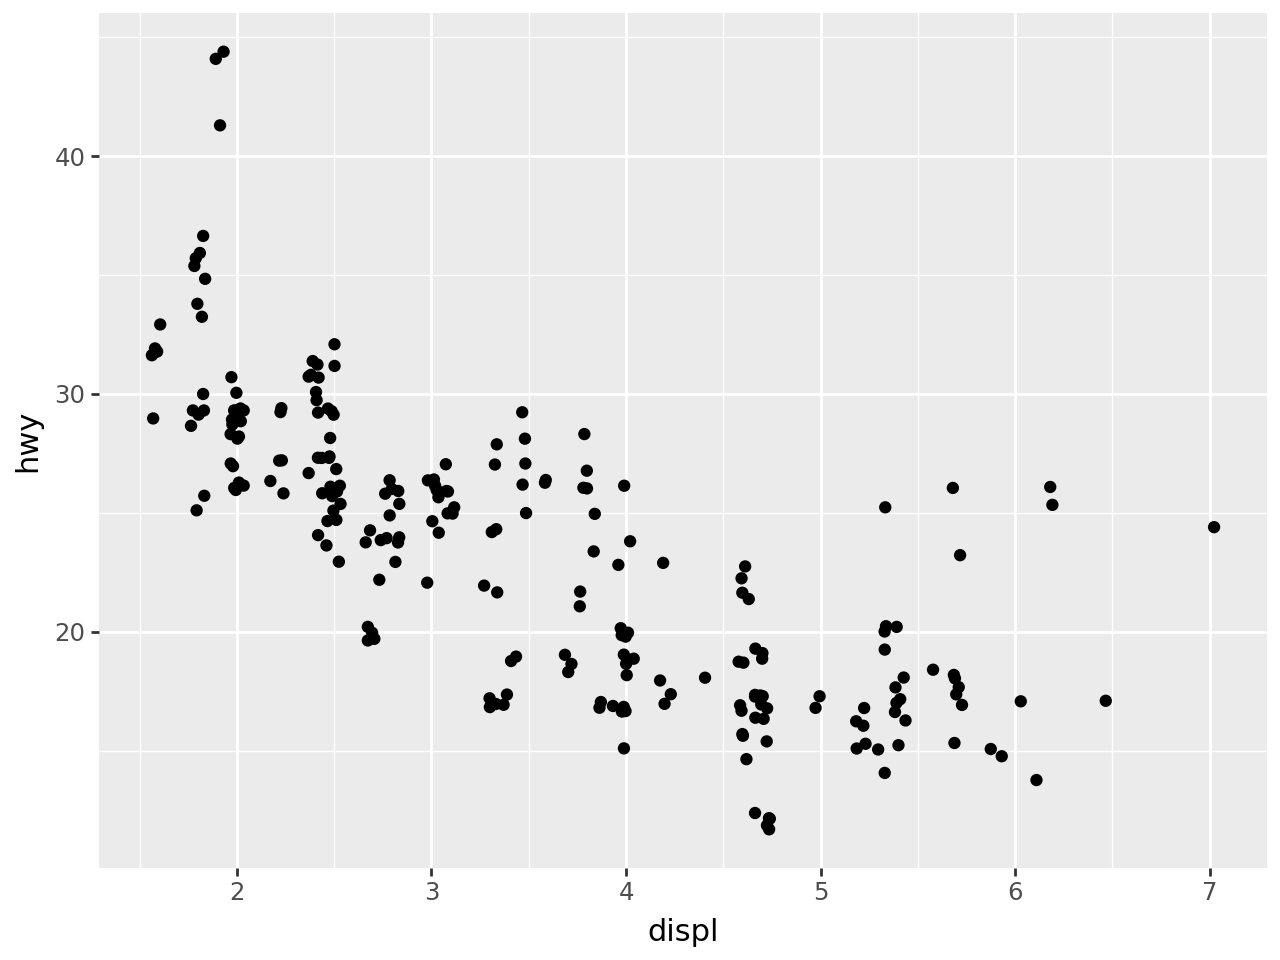

In [45]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"), position="jitter")


### Зачем тут coord_fixed()? Что делает geom_abline()?

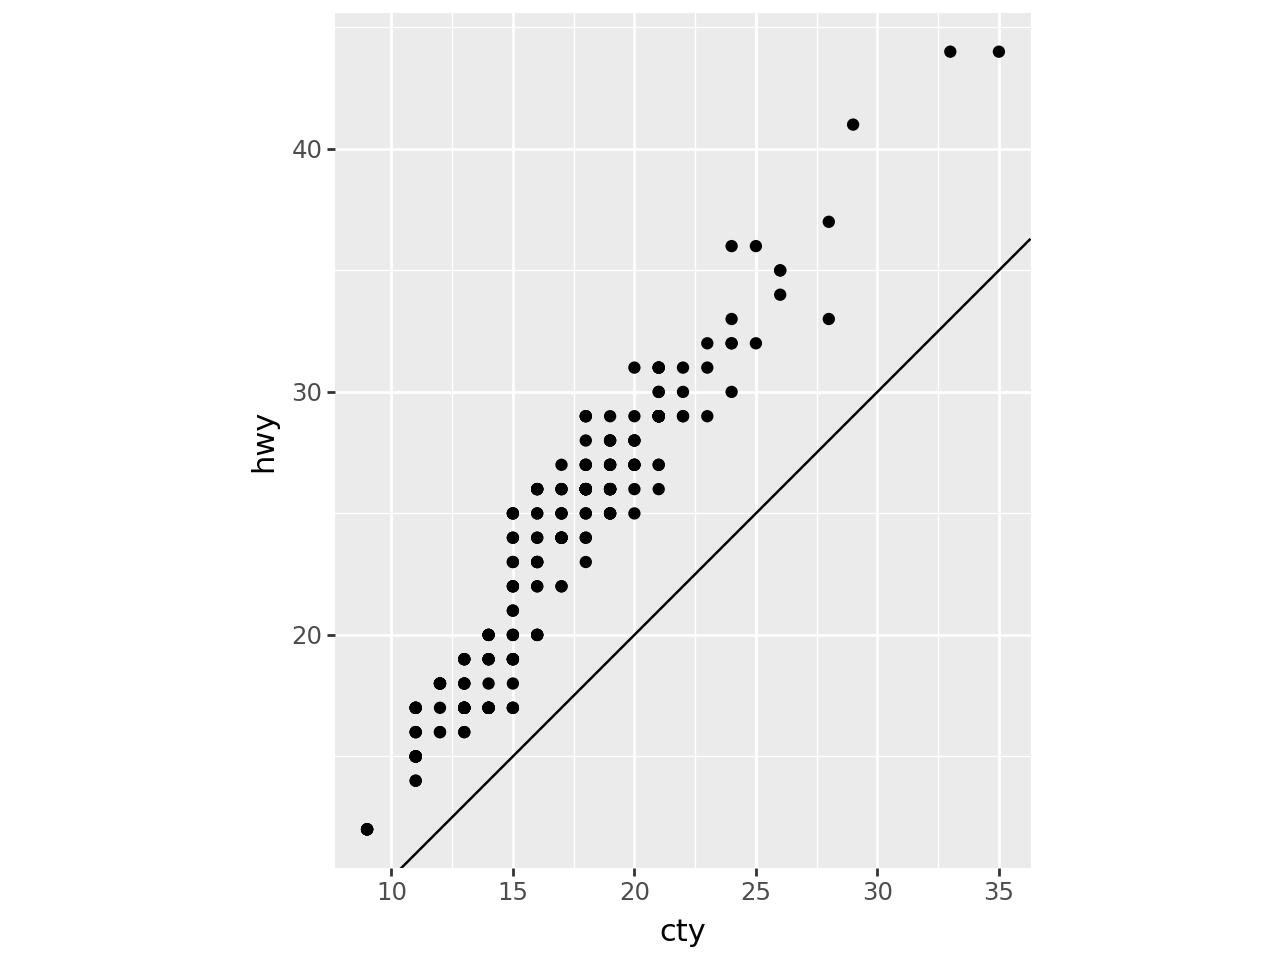

In [46]:
ggplot(data=mpg, mapping=aes(x="cty", y="hwy")) +\
geom_point() +\
geom_abline() +\
coord_fixed()


#### geom_abline() добавляет на график линию, которая имеет уравнение в виде: 𝑦 = 𝑚 𝑥 + 𝑏 
#### coord_fixed() используется для установки фиксированного соотношения сторон для осей на графике. Это означает, что единицы на осях x и y будут иметь одинаковый масштаб. Без использования coord_fixed(), масштабы осей могут быть различными, и, например, круг может выглядеть как эллипс, если соотношение осей не будет зафиксировано.